# Setup

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [ ]:
!git clone https://github.com/cch1999/posecheck.git
!conda install -c mx reduce
!pip install -e /content/posecheck/
!pip install -r /content/posecheck/requirements.txt
!conda install -c conda-forge openbabel

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import sys
sys.path.insert(0,'/content/posecheck/')

Mounted at /content/gdrive


In [14]:
from posecheck import PoseCheck
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from rdkit import Chem
from rdkit.Chem.rdchem import BondType as BT
from rdkit.Chem import AllChem, GetPeriodicTable, RemoveHs
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolfiles import SDWriter

# Analysis of DiffDock

## Set up of data pipelines

In [4]:
import pandas as pd

df = pd.read_csv('/content/testset_csv.csv')
del df['protein_sequence']
df['Predicted_Mol_path'] = "NA"
df['protein_path'] = 'NA'
df['1'] = '1'
df['2'] = '1'
df['3'] = '1'
df['4'] = '1'
df['5'] = '1'
df['6'] = '1'
df['7'] = '1'
df['8'] = '1'
df['9'] = '1'
df['10'] = '1'
df

,complex_name,protein_path,ligand_description,Predicted_Mol_path,1,2,3,4,5,6,7,8,9,10
0,0,NA,data/PDBBind_processed/6qqw/6qqw_ligand.mol2,NA,1,1,1,1,1,1,1,1,1,1
1,1,NA,data/PDBBind_processed/6d08/6d08_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
2,2,NA,data/PDBBind_processed/6jap/6jap_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
3,3,NA,data/PDBBind_processed/6np2/6np2_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
4,4,NA,data/PDBBind_processed/6uvp/6uvp_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,358,NA,data/PDBBind_processed/6pya/6pya_ligand.mol2,NA,1,1,1,1,1,1,1,1,1,1
359,359,NA,data/PDBBind_processed/6ffe/6ffe_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
360,360,NA,data/PDBBind_processed/6d3x/6d3x_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
361,361,NA,data/PDBBind_processed/6gj8/6gj8_ligand.mol2,NA,1,1,1,1,1,1,1,1,1,1


In [6]:
mylist = []
for i in range(363):
  mylist.append(df['ligand_description'].iloc[i].split('/')[2])

print(mylist)

['6qqw', '6d08', '6jap', '6np2', '6uvp', '6oxq', '6jsn', '6hzb', '6qrc', '6oio', '6jag', '6moa', '6hld', '6i9a', '6e4c', '6g24', '6jb4', '6s55', '6seo', '6dyz', '5zk5', '6jid', '5ze6', '6qlu', '6a6k', '6qgf', '6e3z', '6te6', '6pka', '6g2o', '6jsf', '5zxk', '6qxd', '6n97', '6jt3', '6qtr', '6oy1', '6n96', '6qzh', '6qqz', '6qmt', '6ibx', '6hmt', '5zk7', '6k3l', '6cjs', '6n9l', '6ibz', '6ott', '6gge', '6hot', '6e3p', '6md6', '6hlb', '6fe5', '6uwp', '6npp', '6g2f', '6mo7', '6bqd', '6nsv', '6i76', '6n53', '6g2c', '6eeb', '6n0m', '6uvy', '6ovz', '6olx', '6v5l', '6hhg', '5zcu', '6dz2', '6mjq', '6efk', '6s9w', '6gdy', '6kqi', '6ueg', '6oxt', '6oy0', '6qr7', '6i41', '6cyg', '6qmr', '6g27', '6ggb', '6g3c', '6n4e', '6fcj', '6quv', '6iql', '6i74', '6qr4', '6rnu', '6jib', '6izq', '6qw8', '6qto', '6qrd', '6hza', '6e5s', '6dz3', '6e6w', '6cyh', '5zlf', '6om4', '6gga', '6pgp', '6qqv', '6qtq', '6gj6', '6os5', '6s07', '6i77', '6hhj', '6ahs', '6oxx', '6mjj', '6hor', '6jb0', '6i68', '6pz4', '6mhb', '6uim',

In [39]:
import os
directory = '/content/gdrive/MyDrive/Protein_data/user_predictions_testset/'
predicted_ligand = []
for filename in os.listdir(directory):
  if 'index' in filename:
    f = os.path.join(directory, filename)
    #print(filename)
    for filename2 in os.listdir(f):
      if "rank1.sdf" in filename2:
        g = os.path.join(f, filename2)
        #print(filename[5:8])
        predicted_ligand.append((filename[5:8],g))
        #print(g)

In [ ]:
for item in predicted_ligand:
  for i in range(363):
    if item[0][-1].isdigit():
      index = int(item[0])
    elif item[0][-2].isdigit():
      index = int(item[0][:2])
    else:
      index = int(item[0][0])
    if index == df['complex_name'].iloc[i]:
      df['Predicted_Mol_path'].iloc[i] = item[1]

In [24]:

rootdir2 = '/content/gdrive/MyDrive/Protein_data/inference_output'

reference_proteins = []
for filename in os.listdir(rootdir2):
  if filename in mylist:
    f = os.path.join(rootdir2, filename)
    #print(filename)

    for filename2 in os.listdir(f):
      if "protein" in filename2:
        g = os.path.join(f, filename2)
        reference_proteins.append((filename,g))

In [ ]:
for item in reference_proteins:
  for i in range(363):
    if item[0] == df['ligand_description'].iloc[i].split('/')[2]:
      df['protein_path'].iloc[i] = item[1]

In [52]:
df

,complex_name,protein_path,ligand_description,Predicted_Mol_path,1,2,3,4,5,6,7,8,9,10
0,0,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6qqw/6qqw_ligand.mol2,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
1,1,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6d08/6d08_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
2,2,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6jap/6jap_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
3,3,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6np2/6np2_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
4,4,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6uvp/6uvp_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,358,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6pya/6pya_ligand.mol2,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
359,359,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6ffe/6ffe_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
360,360,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6d3x/6d3x_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
361,361,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6gj8/6gj8_ligand.mol2,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1


## Analysis of energy and clashes

In [ ]:
pc = PoseCheck()

values = []

for i in range(363):
  protein = df['ligand_description'].iloc[i].split('/')[2]
  if df['protein_path'].iloc[i] != "NA":
    pc.load_protein_from_pdb(df['protein_path'].iloc[i])

    pc.load_ligands_from_sdf(df['Predicted_Mol_path'].iloc[i])
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([protein,clashes[0],strain[0],interactions])

In [55]:
len(values)

168

In [ ]:
#pc.load_protein_from_pdb(df['protein_path'].iloc[171])
#pc.load_protein_from_pdb(df['protein_path'].iloc[210])
#pc.load_protein_from_pdb(df['protein_path'].iloc[287])

In [87]:
df['protein_path'].iloc[287]

'/content/gdrive/MyDrive/Protein_data/inference_output/6qtm/6qtm_protein_processed.pdb'

In [ ]:
pc = PoseCheck()

values = []

for i in range(363):
  protein = df['ligand_description'].iloc[i].split('/')[2]
  if df['protein_path'].iloc[i] != "NA":
    pc.load_protein_from_pdb(df['protein_path'].iloc[i])

    pc.load_ligands_from_sdf(df['Predicted_Mol_path'].iloc[i])
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    #interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([protein,clashes[0],strain[0]])

In [ ]:
for i in range(172,363):
  protein = df['ligand_description'].iloc[i].split('/')[2]
  if df['protein_path'].iloc[i] != "NA":
    pc.load_protein_from_pdb(df['protein_path'].iloc[i])

    pc.load_ligands_from_sdf(df['Predicted_Mol_path'].iloc[i])
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    #interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([protein,clashes[0],strain[0]])

In [ ]:
for i in range(211,363):
  protein = df['ligand_description'].iloc[i].split('/')[2]
  if df['protein_path'].iloc[i] != "NA":
    pc.load_protein_from_pdb(df['protein_path'].iloc[i])

    pc.load_ligands_from_sdf(df['Predicted_Mol_path'].iloc[i])
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    #interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([protein,clashes[0],strain[0]])

In [ ]:
for i in range(288,363):
  protein = df['ligand_description'].iloc[i].split('/')[2]
  if df['protein_path'].iloc[i] != "NA":
    pc.load_protein_from_pdb(df['protein_path'].iloc[i])

    pc.load_ligands_from_sdf(df['Predicted_Mol_path'].iloc[i])
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    #interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([protein,clashes[0],strain[0]])

In [92]:
import numpy as np
values2 = np.array(values)
print(values2)

[['6qqw' '11' '30.680000000000007']
 ['6d08' '97' '298.32']
 ['6jap' '31' '192.77']
 ...
 ['6d3x' '202' '292687336.5']
 ['6gj8' '22' '51.01000000000002']
 ['6mo2' '25' '169.95999999999998']]


In [98]:
values3 = values2.copy()

In [93]:
df2a= pd.DataFrame(values2)
df2a.to_csv("file.csv")

In [109]:
df

,Unnamed: 0,0,1,2
0,0,6qqw,11,3.068000e+01
1,1,6d08,97,2.983200e+02
2,2,6jap,31,1.927700e+02
3,3,6np2,46,1.208670e+03
4,4,6uvp,2,1.780000e+02
...,...,...,...,...
351,351,6pya,69,8.628000e+01
352,352,6ffe,8,1.821400e+02
353,353,6d3x,202,2.926873e+08
354,354,6gj8,22,5.101000e+01


In [130]:
energy = df['2'].to_numpy()

In [131]:
energy

array([3.06800000e+01, 2.98320000e+02, 1.92770000e+02, 1.20867000e+03,
       1.78000000e+02, 7.89986000e+03, 2.10280000e+02, 2.35701603e+11,
       4.42200000e+01, 4.83700000e+01, 1.01610000e+02, 9.96500000e+01,
                  nan, 4.76990000e+02, 4.18900000e+01, 2.29000000e+01,
       2.93910000e+02, 6.56500000e+01,            nan, 7.25100000e+01,
                  nan, 3.70900000e+01, 1.03870000e+02, 7.92100000e+01,
       2.47190000e+02, 8.15500000e+01, 1.34180000e+02, 3.09500000e+01,
       3.64155000e+03, 4.26600000e+01, 9.75530000e+02, 1.44900000e+02,
       9.74000000e+01, 2.02138950e+05, 2.28360000e+02, 1.89772000e+04,
       2.47470000e+02, 5.30600000e+01, 2.30300000e+01, 5.38800000e+01,
       4.15500000e+01, 1.16650000e+03, 1.86160000e+02, 5.53600000e+01,
       3.24430000e+02, 1.21960000e+02, 5.11300000e+01, 2.55631000e+03,
       3.31300000e+01, 1.26770000e+02, 2.33000000e+01, 1.30700000e+02,
                  nan, 1.02230000e+02, 2.69340000e+02, 8.57000000e+01,
      

In [132]:
data = energy[~np.isnan(energy)]

In [115]:
values2.T[1]
y = np.array([int(i) for i in values2.T[1]])

In [117]:
values2.T[1] = y

In [118]:
values2.T[1]
z = np.array([float(i) for i in values2.T[2]])
values2.T[2] = z

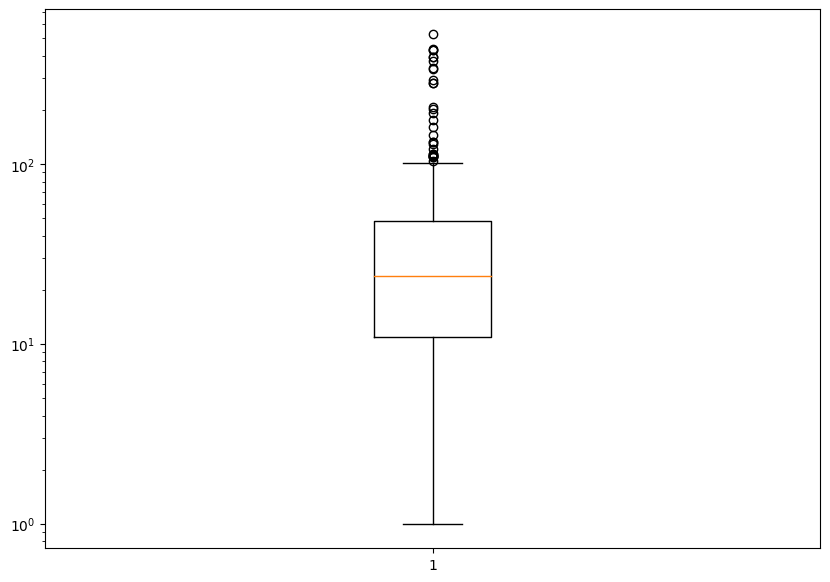

<Figure size 640x480 with 0 Axes>

In [148]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.yscale("log")
plt.boxplot(y)
plt.show()
plt.savefig('Diffdock Clashes.png')

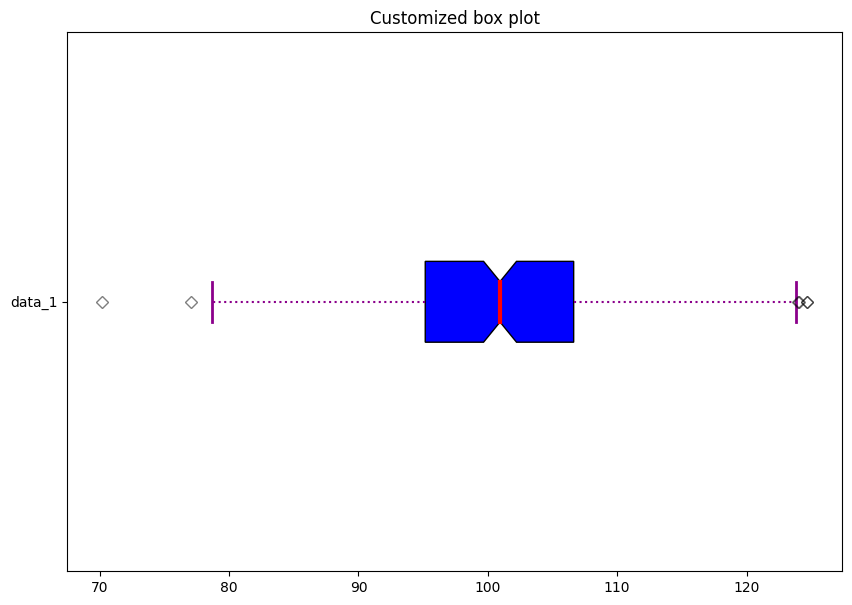

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating dataset
np.random.seed(10)
data_1 = np.random.normal(100, 10, 200)

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data_1, patch_artist = True,
				notch ='True', vert = 0)

colors = ['#0000FF']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['data_1'])

# Adding title
plt.title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()


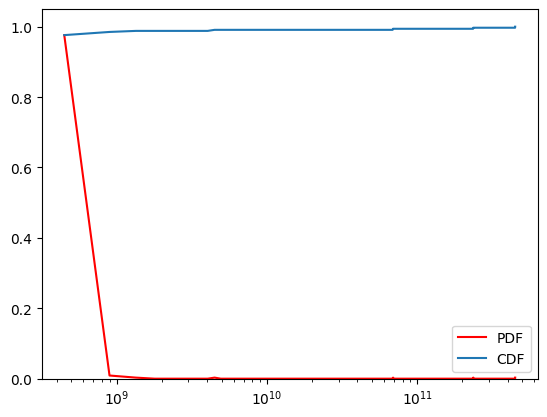

<Figure size 640x480 with 0 Axes>

In [47]:
%matplotlib inline
#data = z[~np.isnan(z)]
count, bins_count = np.histogram(data3, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")

plt.xscale('log')
#plt.xlim((0, 1000))
plt.ylim(0, 1.05)
plt.legend()
plt.show()
plt.savefig('Strain.png')

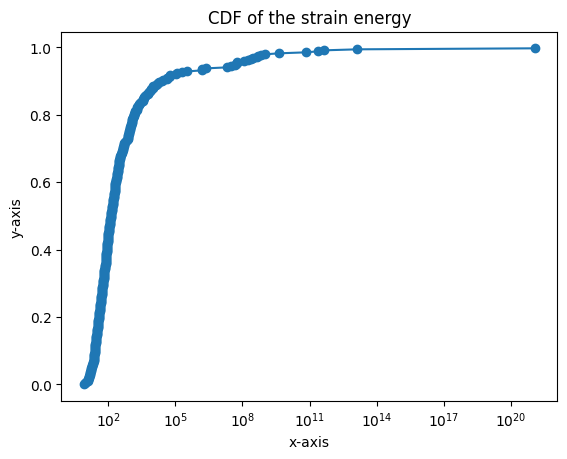

In [50]:
x = np.sort(data)
N = len(data)

# get the cdf values of y
y = np.arange(N) / float(N)

# plotting
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.title('CDF of the strain energy')

plt.plot(x, y, marker='o')
plt.xscale('log')

In [22]:
data2 = np.delete(data, 245)
data3 = np.delete(data2, 232)

In [37]:
np.mean(data)

3.450403374890026e+18

In [38]:
np.median(data)

129.52499999999998

In [23]:
 np.max(data3)

448704563033.96

(array([335.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([8.11000000e+00, 1.15933552e+20, 2.31867104e+20, 3.47800656e+20,
        4.63734208e+20, 5.79667760e+20, 6.95601312e+20, 8.11534864e+20,
        9.27468416e+20, 1.04340197e+21, 1.15933552e+21]),
 <BarContainer object of 10 artists>)

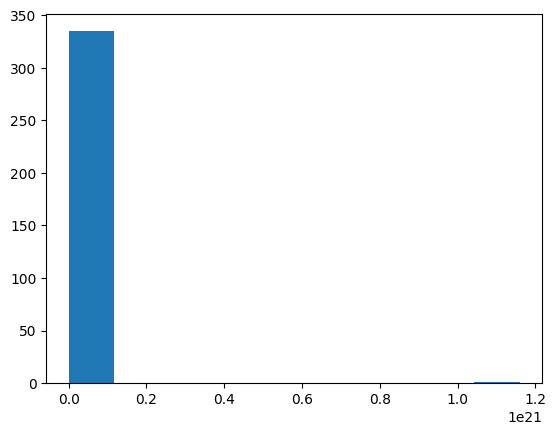

In [25]:
plt.hist(data)

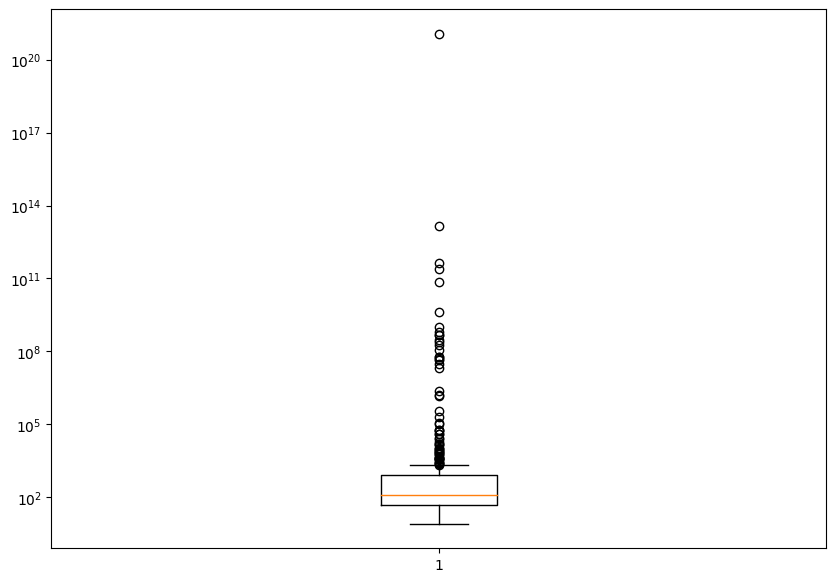

<Figure size 640x480 with 0 Axes>

In [36]:
fig = plt.figure(figsize =(10, 7))
plt.yscale("log")
plt.boxplot(data)
plt.show()
plt.savefig('Diffdock Clashes.png')

In [138]:
np.argmax(z[~np.isnan(z)])

245

In [147]:
np.median(data[~245])

1098.2800000000002

In [151]:
with open('/content/gdrive/MyDrive/Protein_data/user_predictions_testset/complex_names.npy', 'rb') as f:
    complex_names = np.load(f)

In [162]:
complex_names[1].split('/')[2]

'6d08'

In [153]:
with open('/content/gdrive/MyDrive/Protein_data/user_predictions_testset/rmsds.npy', 'rb') as f:
    rmsd = np.load(f)

In [160]:
len(rmsd)

363

In [ ]:
what = []
for i in range(363):
  what.append([complex_names[i].split('/')[2], float(rmsd[i][0])])

what = np.array(what)
what

In [167]:
what.shape

(363, 2)

In [171]:
y_1 = []
for item in values2.T[0]:
  for i in range(what.shape[0]):
    if item == what[i,0]:
      y_1.append(float(what[i,1]))

y_1 = np.array(y_1)


In [173]:
np.corrcoef(y_1, y)

array([[1.        , 0.27004545],
       [0.27004545, 1.        ]])

In [175]:
df.to_csv('paths.csv')

/content/gdrive/MyDrive/Protein_data/user_predictions_testset/index0_data-PDBBind_processed-6qqw-6qqw_protein_processed.pdb____data-PDBBind_processed-6qqw-6qqw_ligand.mol2/rank1.sdf

# HF?

In [ ]:
import os
directory = '/content/gdrive/MyDrive/Protein_data/inference_output'
lig_path = []
paths = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    temp = [filename]
    for filename2 in os.listdir(f):
      if "protein_processed.pdb" in filename2:
        temp.append(os.path.join(f, filename2))
    for filename2 in os.listdir(f):
      if 'ligand.' in filename2:
        temp.append(os.path.join(f, filename2))
    paths.append(temp)
     #   g = os.path.join(f, filename2)

      #  predicted_ligand.append((filename[5:8],g))
paths

In [ ]:
#pc.load_protein_from_pdb(df['protein_path'].iloc[70])
#pc.load_protein_from_pdb(df['protein_path'].iloc[168])
#pc.load_protein_from_pdb(df['protein_path'].iloc[171]) (170)
#pc.load_protein_from_pdb(df['protein_path'].iloc[210])
#278
#pc.load_protein_from_pdb(df['protein_path'].iloc[287])

In [6]:
def read_molecule(molecule_file, sanitize=False, calc_charges=False, remove_hs=False):
    if molecule_file.endswith('.mol2'):
        mol = Chem.MolFromMol2File(molecule_file, sanitize=False, removeHs=False)
    elif molecule_file.endswith('.sdf'):
        supplier = Chem.SDMolSupplier(molecule_file, sanitize=False, removeHs=False)
        mol = supplier[0]
    elif molecule_file.endswith('.pdbqt'):
        with open(molecule_file) as file:
            pdbqt_data = file.readlines()
        pdb_block = ''
        for line in pdbqt_data:
            pdb_block += '{}\n'.format(line[:66])
        mol = Chem.MolFromPDBBlock(pdb_block, sanitize=False, removeHs=False)
    elif molecule_file.endswith('.pdb'):
        mol = Chem.MolFromPDBFile(molecule_file, sanitize=False, removeHs=False)
    else:
        raise ValueError('Expect the format of the molecule_file to be '
                         'one of .mol2, .sdf, .pdbqt and .pdb, got {}'.format(molecule_file))

    try:
        if sanitize or calc_charges:
            Chem.SanitizeMol(mol)

        if calc_charges:
            # Compute Gasteiger charges on the molecule.
            try:
                AllChem.ComputeGasteigerCharges(mol)
            except:
                warnings.warn('Unable to compute charges for the molecule.')

        if remove_hs:
            mol = Chem.RemoveHs(mol, sanitize=sanitize)
    except Exception as e:
        print(e)
        print("RDKit was unable to read the molecule.")
        return None

    return mol

In [43]:
pc = PoseCheck()

for i in range(171,210):
    item = paths[i]
    pc.load_protein_from_pdb(item[1])

    mol = read_molecule(item[2])

    pc.load_ligands_from_mols(mol)
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([item[0],clashes[0],strain[0],interactions])

for i in range(279,287):
    item = paths[i]
    pc.load_protein_from_pdb(item[1])

    mol = read_molecule(item[2])

    pc.load_ligands_from_mols(mol)
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([item[0],clashes[0],strain[0],interactions])

for i in range(288,len(paths)):
    item = paths[i]
    pc.load_protein_from_pdb(item[1])

    mol = read_molecule(item[2])

    pc.load_ligands_from_mols(mol)
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([item[0],clashes[0],strain[0],interactions])

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:12:31] Explicit valence for atom # 23 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:12:31] UFFTYPER: Unrecognized hybridization for atom: 0
[08:12:31] UFFTYPER: Unrecognized atom type: N_ (0)
[08:12:31] UFFTYPER: Unrecognized hybridization for atom: 1
[08:12:31] UFFTYPER: Unrecognized atom type: C_ (1)
[08:12:31] UFFTYPER: Unrecognized hybridization for atom: 2
[08:12:31] UFFTYPER: Unrecognized atom type: C_ (2)
[08:12:31] UFFTYPER: Unrecognized hybridization for atom: 3
[08:12:31] UFFTYPER: Unrecognized atom type: C_ (3)
[08:12:31] UFFTYPER: Unrecognized hybridization for atom: 4
[08:12:31] UFFTYPER: Unrecognized atom type: C_ (4)
[08:12:31] UFFTYPER: Unrecognized hybridization for atom: 5
[08:12:31] UFFTYPER: Unrecognized atom type: C_ (5)
[08:12:31] UFFTYPER: Unrecognized hybridization for atom: 6
[08:12:31] UFFTYPER: Unrecognized atom type: C_ (6)
[08:12:31] UFFTYPER: Unrecognized hybridization for atom: 7
[08:12:31] UFFTYPER: Unrecognized atom type: C_ (7)
[08:12:31] UFFTYPER: Unrecognized hybridization for atom: 8
[08:12:31] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:12:38] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:12:40] UFFTYPER: Unrecognized hybridization for atom: 0
[08:12:40] UFFTYPER: Unrecognized atom type: C_ (0)
[08:12:40] UFFTYPER: Unrecognized hybridization for atom: 1
[08:12:40] UFFTYPER: Unrecognized atom type: C_ (1)
[08:12:40] UFFTYPER: Unrecognized hybridization for atom: 2
[08:12:40] UFFTYPER: Unrecognized atom type: C_ (2)
[08:12:40] UFFTYPER: Unrecognized hybridization for atom: 3
[08:12:40] UFFTYPER: Unrecognized atom type: C_ (3)
[08:12:40] UFFTYPER: Unrecognized hybridization for atom: 4
[08:12:40] UFFTYPER: Unrecognized atom type: C_ (4)
[08:12:40] UFFTYPER: Unrecognized hybridization for atom: 5
[08:12:40] UFFTYPER: Unrecognized atom type: C_ (5)
[08:12:40] UFFTYPER: Unrecognized hybridization for atom: 6
[08:12:40] UFFTYPER: Unrecognized atom type: C_ (6)
[08:12:40] UFFTYPER: Unrecognized hybridization for atom: 7
[08:12:40] UFFTYPER: Unrecognized atom type: C_ (7)
[08:12:40] UFFTYPER: Unrecognized hybridization for atom: 8
[08:12:40] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:12:49] Explicit valence for atom # 331 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:12:51] UFFTYPER: Unrecognized hybridization for atom: 0
[08:12:51] UFFTYPER: Unrecognized atom type: N_ (0)
[08:12:51] UFFTYPER: Unrecognized hybridization for atom: 1
[08:12:51] UFFTYPER: Unrecognized atom type: N_ (1)
[08:12:51] UFFTYPER: Unrecognized hybridization for atom: 2
[08:12:51] UFFTYPER: Unrecognized atom type: C_ (2)
[08:12:51] UFFTYPER: Unrecognized hybridization for atom: 3
[08:12:51] UFFTYPER: Unrecognized atom type: C_ (3)
[08:12:51] UFFTYPER: Unrecognized hybridization for atom: 4
[08:12:51] UFFTYPER: Unrecognized atom type: C_ (4)
[08:12:51] UFFTYPER: Unrecognized hybridization for atom: 5
[08:12:51] UFFTYPER: Unrecognized atom type: C_ (5)
[08:12:51] UFFTYPER: Unrecognized hybridization for atom: 6
[08:12:51] UFFTYPER: Unrecognized atom type: C_ (6)
[08:12:51] UFFTYPER: Unrecognized hybridization for atom: 7
[08:12:51] UFFTYPER: Unrecognized atom type: C_ (7)
[08:12:51] UFFTYPER: Unrecognized hybridization for atom: 8
[08:12:51] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:13:19] Explicit valence for atom # 284 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:13:21] UFFTYPER: Unrecognized hybridization for atom: 0
[08:13:21] UFFTYPER: Unrecognized atom type: C_ (0)
[08:13:21] UFFTYPER: Unrecognized hybridization for atom: 1
[08:13:21] UFFTYPER: Unrecognized atom type: C_ (1)
[08:13:21] UFFTYPER: Unrecognized hybridization for atom: 2
[08:13:21] UFFTYPER: Unrecognized atom type: C_ (2)
[08:13:21] UFFTYPER: Unrecognized hybridization for atom: 3
[08:13:21] UFFTYPER: Unrecognized atom type: C_ (3)
[08:13:21] UFFTYPER: Unrecognized hybridization for atom: 4
[08:13:21] UFFTYPER: Unrecognized atom type: C_ (4)
[08:13:21] UFFTYPER: Unrecognized hybridization for atom: 5
[08:13:21] UFFTYPER: Unrecognized atom type: C_ (5)
[08:13:21] UFFTYPER: Unrecognized hybridization for atom: 6
[08:13:21] UFFTYPER: Unrecognized atom type: O_ (6)
[08:13:21] UFFTYPER: Unrecognized hybridization for atom: 7
[08:13:21] UFFTYPER: Unrecognized atom type: O_ (7)
[08:13:21] UFFTYPER: Unrecognized hybridization for atom: 8
[08:13:21] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:13:34] Explicit valence for atom # 116 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:13:35] UFFTYPER: Unrecognized hybridization for atom: 0
[08:13:35] UFFTYPER: Unrecognized atom type: C_ (0)
[08:13:35] UFFTYPER: Unrecognized hybridization for atom: 1
[08:13:35] UFFTYPER: Unrecognized atom type: C_ (1)
[08:13:35] UFFTYPER: Unrecognized hybridization for atom: 2
[08:13:35] UFFTYPER: Unrecognized atom type: C_ (2)
[08:13:35] UFFTYPER: Unrecognized hybridization for atom: 3
[08:13:35] UFFTYPER: Unrecognized atom type: C_ (3)
[08:13:35] UFFTYPER: Unrecognized hybridization for atom: 4
[08:13:35] UFFTYPER: Unrecognized atom type: C_ (4)
[08:13:35] UFFTYPER: Unrecognized hybridization for atom: 5
[08:13:35] UFFTYPER: Unrecognized atom type: C_ (5)
[08:13:35] UFFTYPER: Unrecognized hybridization for atom: 6
[08:13:35] UFFTYPER: Unrecognized atom type: C_ (6)
[08:13:35] UFFTYPER: Unrecognized hybridization for atom: 7
[08:13:35] UFFTYPER: Unrecognized atom type: C_ (7)
[08:13:35] UFFTYPER: Unrecognized hybridization for atom: 8
[08:13:35] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:13:44] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:13:45] UFFTYPER: Unrecognized hybridization for atom: 0
[08:13:45] UFFTYPER: Unrecognized atom type: C_ (0)
[08:13:45] UFFTYPER: Unrecognized hybridization for atom: 1
[08:13:45] UFFTYPER: Unrecognized atom type: C_ (1)
[08:13:45] UFFTYPER: Unrecognized hybridization for atom: 2
[08:13:45] UFFTYPER: Unrecognized atom type: C_ (2)
[08:13:45] UFFTYPER: Unrecognized hybridization for atom: 3
[08:13:45] UFFTYPER: Unrecognized atom type: C_ (3)
[08:13:45] UFFTYPER: Unrecognized hybridization for atom: 4
[08:13:45] UFFTYPER: Unrecognized atom type: C_ (4)
[08:13:45] UFFTYPER: Unrecognized hybridization for atom: 5
[08:13:45] UFFTYPER: Unrecognized atom type: C_ (5)
[08:13:45] UFFTYPER: Unrecognized hybridization for atom: 6
[08:13:45] UFFTYPER: Unrecognized atom type: C_ (6)
[08:13:45] UFFTYPER: Unrecognized hybridization for atom: 7
[08:13:45] UFFTYPER: Unrecognized atom type: C_ (7)
[08:13:45] UFFTYPER: Unrecognized hybridization for atom: 8
[08:13:45] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:14:09] Explicit valence for atom # 318 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:14:15] UFFTYPER: Unrecognized hybridization for atom: 0
[08:14:15] UFFTYPER: Unrecognized atom type: C_ (0)
[08:14:15] UFFTYPER: Unrecognized hybridization for atom: 1
[08:14:15] UFFTYPER: Unrecognized atom type: C_ (1)
[08:14:15] UFFTYPER: Unrecognized hybridization for atom: 2
[08:14:15] UFFTYPER: Unrecognized atom type: C_ (2)
[08:14:15] UFFTYPER: Unrecognized hybridization for atom: 3
[08:14:15] UFFTYPER: Unrecognized atom type: N_ (3)
[08:14:15] UFFTYPER: Unrecognized hybridization for atom: 4
[08:14:15] UFFTYPER: Unrecognized atom type: N_ (4)
[08:14:15] UFFTYPER: Unrecognized hybridization for atom: 5
[08:14:15] UFFTYPER: Unrecognized atom type: C_ (5)
[08:14:15] UFFTYPER: Unrecognized hybridization for atom: 6
[08:14:15] UFFTYPER: Unrecognized atom type: C_ (6)
[08:14:15] UFFTYPER: Unrecognized hybridization for atom: 7
[08:14:15] UFFTYPER: Unrecognized atom type: N_ (7)
[08:14:15] UFFTYPER: Unrecognized hybridization for atom: 8
[08:14:15] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:14:22] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:14:22] UFFTYPER: Unrecognized hybridization for atom: 0
[08:14:22] UFFTYPER: Unrecognized atom type: C_ (0)
[08:14:22] UFFTYPER: Unrecognized hybridization for atom: 1
[08:14:22] UFFTYPER: Unrecognized atom type: O_ (1)
[08:14:22] UFFTYPER: Unrecognized hybridization for atom: 2
[08:14:22] UFFTYPER: Unrecognized atom type: C_ (2)
[08:14:22] UFFTYPER: Unrecognized hybridization for atom: 3
[08:14:22] UFFTYPER: Unrecognized atom type: C_ (3)
[08:14:22] UFFTYPER: Unrecognized hybridization for atom: 4
[08:14:22] UFFTYPER: Unrecognized atom type: C_ (4)
[08:14:22] UFFTYPER: Unrecognized hybridization for atom: 5
[08:14:22] UFFTYPER: Unrecognized atom type: C_ (5)
[08:14:22] UFFTYPER: Unrecognized hybridization for atom: 6
[08:14:22] UFFTYPER: Unrecognized atom type: N_ (6)
[08:14:22] UFFTYPER: Unrecognized hybridization for atom: 7
[08:14:22] UFFTYPER: Unrecognized atom type: C_ (7)
[08:14:22] UFFTYPER: Unrecognized hybridization for atom: 8
[08:14:22] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:14:28] Explicit valence for atom # 23 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:14:29] UFFTYPER: Unrecognized hybridization for atom: 0
[08:14:29] UFFTYPER: Unrecognized atom type: N_ (0)
[08:14:29] UFFTYPER: Unrecognized hybridization for atom: 1
[08:14:29] UFFTYPER: Unrecognized atom type: N_ (1)
[08:14:29] UFFTYPER: Unrecognized hybridization for atom: 2
[08:14:29] UFFTYPER: Unrecognized atom type: C_ (2)
[08:14:29] UFFTYPER: Unrecognized hybridization for atom: 3
[08:14:29] UFFTYPER: Unrecognized atom type: C_ (3)
[08:14:29] UFFTYPER: Unrecognized hybridization for atom: 4
[08:14:29] UFFTYPER: Unrecognized atom type: C_ (4)
[08:14:29] UFFTYPER: Unrecognized hybridization for atom: 5
[08:14:29] UFFTYPER: Unrecognized atom type: C_ (5)
[08:14:29] UFFTYPER: Unrecognized hybridization for atom: 6
[08:14:29] UFFTYPER: Unrecognized atom type: C_ (6)
[08:14:29] UFFTYPER: Unrecognized hybridization for atom: 7
[08:14:29] UFFTYPER: Unrecognized atom type: C_ (7)
[08:14:29] UFFTYPER: Unrecognized hybridization for atom: 8
[08:14:29] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:14:44] Explicit valence for atom # 284 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:14:47] UFFTYPER: Unrecognized hybridization for atom: 0
[08:14:47] UFFTYPER: Unrecognized atom type: C_ (0)
[08:14:47] UFFTYPER: Unrecognized hybridization for atom: 1
[08:14:47] UFFTYPER: Unrecognized atom type: C_ (1)
[08:14:47] UFFTYPER: Unrecognized hybridization for atom: 2
[08:14:47] UFFTYPER: Unrecognized atom type: C_ (2)
[08:14:47] UFFTYPER: Unrecognized hybridization for atom: 3
[08:14:47] UFFTYPER: Unrecognized atom type: C_ (3)
[08:14:47] UFFTYPER: Unrecognized hybridization for atom: 4
[08:14:47] UFFTYPER: Unrecognized atom type: C_ (4)
[08:14:47] UFFTYPER: Unrecognized hybridization for atom: 5
[08:14:47] UFFTYPER: Unrecognized atom type: C_ (5)
[08:14:47] UFFTYPER: Unrecognized hybridization for atom: 6
[08:14:47] UFFTYPER: Unrecognized atom type: O_ (6)
[08:14:47] UFFTYPER: Unrecognized hybridization for atom: 7
[08:14:47] UFFTYPER: Unrecognized atom type: O_ (7)
[08:14:47] UFFTYPER: Unrecognized hybridization for atom: 8
[08:14:47] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:15:05] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:15:07] UFFTYPER: Unrecognized hybridization for atom: 0
[08:15:07] UFFTYPER: Unrecognized atom type: N_ (0)
[08:15:07] UFFTYPER: Unrecognized hybridization for atom: 1
[08:15:07] UFFTYPER: Unrecognized atom type: C_ (1)
[08:15:07] UFFTYPER: Unrecognized hybridization for atom: 2
[08:15:07] UFFTYPER: Unrecognized atom type: C_ (2)
[08:15:07] UFFTYPER: Unrecognized hybridization for atom: 3
[08:15:07] UFFTYPER: Unrecognized atom type: O_ (3)
[08:15:07] UFFTYPER: Unrecognized hybridization for atom: 4
[08:15:07] UFFTYPER: Unrecognized atom type: C_ (4)
[08:15:07] UFFTYPER: Unrecognized hybridization for atom: 5
[08:15:07] UFFTYPER: Unrecognized atom type: C_ (5)
[08:15:07] UFFTYPER: Unrecognized hybridization for atom: 6
[08:15:07] UFFTYPER: Unrecognized atom type: C_ (6)
[08:15:07] UFFTYPER: Unrecognized hybridization for atom: 7
[08:15:07] UFFTYPER: Unrecognized atom type: C_ (7)
[08:15:07] UFFTYPER: Unrecognized hybridization for atom: 8
[08:15:07] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:15:14] Explicit valence for atom # 411 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:15:15] UFFTYPER: Unrecognized hybridization for atom: 0
[08:15:15] UFFTYPER: Unrecognized atom type: C_ (0)
[08:15:15] UFFTYPER: Unrecognized hybridization for atom: 1
[08:15:15] UFFTYPER: Unrecognized atom type: C_ (1)
[08:15:15] UFFTYPER: Unrecognized hybridization for atom: 2
[08:15:15] UFFTYPER: Unrecognized atom type: C_ (2)
[08:15:15] UFFTYPER: Unrecognized hybridization for atom: 3
[08:15:15] UFFTYPER: Unrecognized atom type: C_ (3)
[08:15:15] UFFTYPER: Unrecognized hybridization for atom: 4
[08:15:15] UFFTYPER: Unrecognized atom type: C_ (4)
[08:15:15] UFFTYPER: Unrecognized hybridization for atom: 5
[08:15:15] UFFTYPER: Unrecognized atom type: C_ (5)
[08:15:15] UFFTYPER: Unrecognized hybridization for atom: 6
[08:15:15] UFFTYPER: Unrecognized atom type: C_ (6)
[08:15:15] UFFTYPER: Unrecognized hybridization for atom: 7
[08:15:15] UFFTYPER: Unrecognized atom type: C_ (7)
[08:15:15] UFFTYPER: Unrecognized hybridization for atom: 8
[08:15:15] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:15:28] Explicit valence for atom # 8 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:15:31] UFFTYPER: Unrecognized hybridization for atom: 0
[08:15:31] UFFTYPER: Unrecognized atom type: C_ (0)
[08:15:31] UFFTYPER: Unrecognized hybridization for atom: 1
[08:15:31] UFFTYPER: Unrecognized atom type: C_ (1)
[08:15:31] UFFTYPER: Unrecognized hybridization for atom: 2
[08:15:31] UFFTYPER: Unrecognized atom type: C_ (2)
[08:15:31] UFFTYPER: Unrecognized hybridization for atom: 3
[08:15:31] UFFTYPER: Unrecognized atom type: C_ (3)
[08:15:31] UFFTYPER: Unrecognized hybridization for atom: 4
[08:15:31] UFFTYPER: Unrecognized atom type: C_ (4)
[08:15:31] UFFTYPER: Unrecognized hybridization for atom: 5
[08:15:31] UFFTYPER: Unrecognized atom type: C_ (5)
[08:15:31] UFFTYPER: Unrecognized hybridization for atom: 6
[08:15:31] UFFTYPER: Unrecognized atom type: C_ (6)
[08:15:31] UFFTYPER: Unrecognized hybridization for atom: 7
[08:15:31] UFFTYPER: Unrecognized atom type: N_ (7)
[08:15:31] UFFTYPER: Unrecognized hybridization for atom: 8
[08:15:31] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:15:38] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:15:40] UFFTYPER: Unrecognized hybridization for atom: 0
[08:15:40] UFFTYPER: Unrecognized atom type: C_ (0)
[08:15:40] UFFTYPER: Unrecognized hybridization for atom: 1
[08:15:40] UFFTYPER: Unrecognized atom type: C_ (1)
[08:15:40] UFFTYPER: Unrecognized hybridization for atom: 2
[08:15:40] UFFTYPER: Unrecognized atom type: C_ (2)
[08:15:40] UFFTYPER: Unrecognized hybridization for atom: 3
[08:15:40] UFFTYPER: Unrecognized atom type: C_ (3)
[08:15:40] UFFTYPER: Unrecognized hybridization for atom: 4
[08:15:40] UFFTYPER: Unrecognized atom type: C_ (4)
[08:15:40] UFFTYPER: Unrecognized hybridization for atom: 5
[08:15:40] UFFTYPER: Unrecognized atom type: C_ (5)
[08:15:40] UFFTYPER: Unrecognized hybridization for atom: 6
[08:15:40] UFFTYPER: Unrecognized atom type: C_ (6)
[08:15:40] UFFTYPER: Unrecognized hybridization for atom: 7
[08:15:40] UFFTYPER: Unrecognized atom type: C_ (7)
[08:15:40] UFFTYPER: Unrecognized hybridization for atom: 8
[08:15:40] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:15:50] Explicit valence for atom # 42 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:15:51] UFFTYPER: Unrecognized hybridization for atom: 0
[08:15:51] UFFTYPER: Unrecognized atom type: C_ (0)
[08:15:51] UFFTYPER: Unrecognized hybridization for atom: 1
[08:15:51] UFFTYPER: Unrecognized atom type: C_ (1)
[08:15:51] UFFTYPER: Unrecognized hybridization for atom: 2
[08:15:51] UFFTYPER: Unrecognized atom type: C_ (2)
[08:15:51] UFFTYPER: Unrecognized hybridization for atom: 3
[08:15:51] UFFTYPER: Unrecognized atom type: C_ (3)
[08:15:51] UFFTYPER: Unrecognized hybridization for atom: 4
[08:15:51] UFFTYPER: Unrecognized atom type: C_ (4)
[08:15:51] UFFTYPER: Unrecognized hybridization for atom: 5
[08:15:51] UFFTYPER: Unrecognized atom type: C_ (5)
[08:15:51] UFFTYPER: Unrecognized hybridization for atom: 6
[08:15:51] UFFTYPER: Unrecognized atom type: C_ (6)
[08:15:51] UFFTYPER: Unrecognized hybridization for atom: 7
[08:15:51] UFFTYPER: Unrecognized atom type: C_ (7)
[08:15:51] UFFTYPER: Unrecognized hybridization for atom: 8
[08:15:51] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:16:08] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:16:10] UFFTYPER: Unrecognized hybridization for atom: 0
[08:16:10] UFFTYPER: Unrecognized atom type: C_ (0)
[08:16:10] UFFTYPER: Unrecognized hybridization for atom: 1
[08:16:10] UFFTYPER: Unrecognized atom type: C_ (1)
[08:16:10] UFFTYPER: Unrecognized hybridization for atom: 2
[08:16:10] UFFTYPER: Unrecognized atom type: C_ (2)
[08:16:10] UFFTYPER: Unrecognized hybridization for atom: 3
[08:16:10] UFFTYPER: Unrecognized atom type: C_ (3)
[08:16:10] UFFTYPER: Unrecognized hybridization for atom: 4
[08:16:10] UFFTYPER: Unrecognized atom type: C_ (4)
[08:16:10] UFFTYPER: Unrecognized hybridization for atom: 5
[08:16:10] UFFTYPER: Unrecognized atom type: C_ (5)
[08:16:10] UFFTYPER: Unrecognized hybridization for atom: 6
[08:16:10] UFFTYPER: Unrecognized atom type: C_ (6)
[08:16:10] UFFTYPER: Unrecognized hybridization for atom: 7
[08:16:10] UFFTYPER: Unrecognized atom type: C_ (7)
[08:16:10] UFFTYPER: Unrecognized hybridization for atom: 8
[08:16:10] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:16:24] Explicit valence for atom # 2079 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:16:25] UFFTYPER: Unrecognized hybridization for atom: 0
[08:16:25] UFFTYPER: Unrecognized atom type: N_ (0)
[08:16:25] UFFTYPER: Unrecognized hybridization for atom: 1
[08:16:25] UFFTYPER: Unrecognized atom type: C_ (1)
[08:16:25] UFFTYPER: Unrecognized hybridization for atom: 2
[08:16:25] UFFTYPER: Unrecognized atom type: C_ (2)
[08:16:25] UFFTYPER: Unrecognized hybridization for atom: 3
[08:16:25] UFFTYPER: Unrecognized atom type: O_ (3)
[08:16:25] UFFTYPER: Unrecognized hybridization for atom: 4
[08:16:25] UFFTYPER: Unrecognized atom type: C_ (4)
[08:16:25] UFFTYPER: Unrecognized hybridization for atom: 5
[08:16:25] UFFTYPER: Unrecognized atom type: C_ (5)
[08:16:25] UFFTYPER: Unrecognized hybridization for atom: 6
[08:16:25] UFFTYPER: Unrecognized atom type: C_ (6)
[08:16:25] UFFTYPER: Unrecognized hybridization for atom: 7
[08:16:25] UFFTYPER: Unrecognized atom type: C_ (7)
[08:16:25] UFFTYPER: Unrecognized hybridization for atom: 8
[08:16:25] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:16:36] Explicit valence for atom # 195 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:16:37] UFFTYPER: Unrecognized hybridization for atom: 0
[08:16:37] UFFTYPER: Unrecognized atom type: C_ (0)
[08:16:37] UFFTYPER: Unrecognized hybridization for atom: 1
[08:16:37] UFFTYPER: Unrecognized atom type: O_ (1)
[08:16:37] UFFTYPER: Unrecognized hybridization for atom: 2
[08:16:37] UFFTYPER: Unrecognized atom type: C_ (2)
[08:16:37] UFFTYPER: Unrecognized hybridization for atom: 3
[08:16:37] UFFTYPER: Unrecognized atom type: N_ (3)
[08:16:37] UFFTYPER: Unrecognized hybridization for atom: 6
[08:16:37] UFFTYPER: Unrecognized atom type: C_ (6)
[08:16:37] UFFTYPER: Unrecognized hybridization for atom: 7
[08:16:37] UFFTYPER: Unrecognized atom type: C_ (7)
[08:16:37] UFFTYPER: Unrecognized hybridization for atom: 8
[08:16:37] UFFTYPER: Unrecognized atom type: C_ (8)
[08:16:37] UFFTYPER: Unrecognized hybridization for atom: 9
[08:16:37] UFFTYPER: Unrecognized atom type: C_ (9)
[08:16:37] UFFTYPER: Unrecognized hybridization for atom: 10
[08:16:37] UFFTYPER: Unrecognized atom type

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:16:42] Explicit valence for atom # 411 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:16:43] UFFTYPER: Unrecognized hybridization for atom: 0
[08:16:43] UFFTYPER: Unrecognized atom type: C_ (0)
[08:16:43] UFFTYPER: Unrecognized hybridization for atom: 1
[08:16:43] UFFTYPER: Unrecognized atom type: C_ (1)
[08:16:43] UFFTYPER: Unrecognized hybridization for atom: 2
[08:16:43] UFFTYPER: Unrecognized atom type: C_ (2)
[08:16:43] UFFTYPER: Unrecognized hybridization for atom: 3
[08:16:43] UFFTYPER: Unrecognized atom type: C_ (3)
[08:16:43] UFFTYPER: Unrecognized hybridization for atom: 4
[08:16:43] UFFTYPER: Unrecognized atom type: C_ (4)
[08:16:43] UFFTYPER: Unrecognized hybridization for atom: 5
[08:16:43] UFFTYPER: Unrecognized atom type: C_ (5)
[08:16:43] UFFTYPER: Unrecognized hybridization for atom: 6
[08:16:43] UFFTYPER: Unrecognized atom type: C_ (6)
[08:16:43] UFFTYPER: Unrecognized hybridization for atom: 7
[08:16:43] UFFTYPER: Unrecognized atom type: C_ (7)
[08:16:43] UFFTYPER: Unrecognized hybridization for atom: 8
[08:16:43] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:16:58] Explicit valence for atom # 58 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:17:00] UFFTYPER: Unrecognized hybridization for atom: 0
[08:17:00] UFFTYPER: Unrecognized atom type: O_ (0)
[08:17:00] UFFTYPER: Unrecognized hybridization for atom: 1
[08:17:00] UFFTYPER: Unrecognized atom type: C_ (1)
[08:17:00] UFFTYPER: Unrecognized hybridization for atom: 2
[08:17:00] UFFTYPER: Unrecognized atom type: C_ (2)
[08:17:00] UFFTYPER: Unrecognized hybridization for atom: 3
[08:17:00] UFFTYPER: Unrecognized atom type: C_ (3)
[08:17:00] UFFTYPER: Unrecognized hybridization for atom: 4
[08:17:00] UFFTYPER: Unrecognized atom type: C_ (4)
[08:17:00] UFFTYPER: Unrecognized hybridization for atom: 5
[08:17:00] UFFTYPER: Unrecognized atom type: N_ (5)
[08:17:00] UFFTYPER: Unrecognized hybridization for atom: 6
[08:17:00] UFFTYPER: Unrecognized atom type: C_ (6)
[08:17:00] UFFTYPER: Unrecognized hybridization for atom: 7
[08:17:00] UFFTYPER: Unrecognized atom type: C_ (7)
[08:17:00] UFFTYPER: Unrecognized hybridization for atom: 8
[08:17:00] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:17:14] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:17:16] UFFTYPER: Unrecognized hybridization for atom: 0
[08:17:16] UFFTYPER: Unrecognized atom type: C_ (0)
[08:17:16] UFFTYPER: Unrecognized hybridization for atom: 1
[08:17:16] UFFTYPER: Unrecognized atom type: C_ (1)
[08:17:16] UFFTYPER: Unrecognized hybridization for atom: 2
[08:17:16] UFFTYPER: Unrecognized atom type: C_ (2)
[08:17:16] UFFTYPER: Unrecognized hybridization for atom: 3
[08:17:16] UFFTYPER: Unrecognized atom type: C_ (3)
[08:17:16] UFFTYPER: Unrecognized hybridization for atom: 4
[08:17:16] UFFTYPER: Unrecognized atom type: C_ (4)
[08:17:16] UFFTYPER: Unrecognized hybridization for atom: 5
[08:17:16] UFFTYPER: Unrecognized atom type: C_ (5)
[08:17:16] UFFTYPER: Unrecognized hybridization for atom: 6
[08:17:16] UFFTYPER: Unrecognized atom type: C_ (6)
[08:17:16] UFFTYPER: Unrecognized hybridization for atom: 7
[08:17:16] UFFTYPER: Unrecognized atom type: C_ (7)
[08:17:16] UFFTYPER: Unrecognized hybridization for atom: 8
[08:17:16] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:17:29] Explicit valence for atom # 679 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:17:31] UFFTYPER: Unrecognized hybridization for atom: 0
[08:17:31] UFFTYPER: Unrecognized atom type: C_ (0)
[08:17:31] UFFTYPER: Unrecognized hybridization for atom: 1
[08:17:31] UFFTYPER: Unrecognized atom type: C_ (1)
[08:17:31] UFFTYPER: Unrecognized hybridization for atom: 2
[08:17:31] UFFTYPER: Unrecognized atom type: C_ (2)
[08:17:31] UFFTYPER: Unrecognized hybridization for atom: 3
[08:17:31] UFFTYPER: Unrecognized atom type: O_ (3)
[08:17:31] UFFTYPER: Unrecognized hybridization for atom: 4
[08:17:31] UFFTYPER: Unrecognized atom type: C_ (4)
[08:17:31] UFFTYPER: Unrecognized hybridization for atom: 5
[08:17:31] UFFTYPER: Unrecognized atom type: C_ (5)
[08:17:31] UFFTYPER: Unrecognized hybridization for atom: 6
[08:17:31] UFFTYPER: Unrecognized atom type: O_ (6)
[08:17:31] UFFTYPER: Unrecognized hybridization for atom: 7
[08:17:31] UFFTYPER: Unrecognized atom type: C_ (7)
[08:17:31] UFFTYPER: Unrecognized hybridization for atom: 8
[08:17:31] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:17:44] Explicit valence for atom # 679 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:17:45] UFFTYPER: Unrecognized hybridization for atom: 0
[08:17:45] UFFTYPER: Unrecognized atom type: C_ (0)
[08:17:45] UFFTYPER: Unrecognized hybridization for atom: 1
[08:17:45] UFFTYPER: Unrecognized atom type: C_ (1)
[08:17:45] UFFTYPER: Unrecognized hybridization for atom: 2
[08:17:45] UFFTYPER: Unrecognized atom type: C_ (2)
[08:17:45] UFFTYPER: Unrecognized hybridization for atom: 3
[08:17:45] UFFTYPER: Unrecognized atom type: C_ (3)
[08:17:45] UFFTYPER: Unrecognized hybridization for atom: 4
[08:17:45] UFFTYPER: Unrecognized atom type: C_ (4)
[08:17:45] UFFTYPER: Unrecognized hybridization for atom: 5
[08:17:45] UFFTYPER: Unrecognized atom type: O_ (5)
[08:17:45] UFFTYPER: Unrecognized hybridization for atom: 6
[08:17:45] UFFTYPER: Unrecognized atom type: C_ (6)
[08:17:45] UFFTYPER: Unrecognized hybridization for atom: 7
[08:17:45] UFFTYPER: Unrecognized atom type: C_ (7)
[08:17:45] UFFTYPER: Unrecognized hybridization for atom: 8
[08:17:45] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:17:54] Explicit valence for atom # 403 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:17:55] UFFTYPER: Unrecognized hybridization for atom: 0
[08:17:55] UFFTYPER: Unrecognized atom type: C_ (0)
[08:17:55] UFFTYPER: Unrecognized hybridization for atom: 1
[08:17:55] UFFTYPER: Unrecognized atom type: C_ (1)
[08:17:55] UFFTYPER: Unrecognized hybridization for atom: 2
[08:17:55] UFFTYPER: Unrecognized atom type: N_ (2)
[08:17:55] UFFTYPER: Unrecognized hybridization for atom: 3
[08:17:55] UFFTYPER: Unrecognized atom type: C_ (3)
[08:17:55] UFFTYPER: Unrecognized hybridization for atom: 4
[08:17:55] UFFTYPER: Unrecognized atom type: C_ (4)
[08:17:55] UFFTYPER: Unrecognized hybridization for atom: 5
[08:17:55] UFFTYPER: Unrecognized atom type: C_ (5)
[08:17:55] UFFTYPER: Unrecognized hybridization for atom: 6
[08:17:55] UFFTYPER: Unrecognized atom type: C_ (6)
[08:17:55] UFFTYPER: Unrecognized hybridization for atom: 7
[08:17:55] UFFTYPER: Unrecognized atom type: C_ (7)
[08:17:55] UFFTYPER: Unrecognized hybridization for atom: 8
[08:17:55] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:18:02] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:18:03] UFFTYPER: Unrecognized hybridization for atom: 0
[08:18:03] UFFTYPER: Unrecognized atom type: C_ (0)
[08:18:03] UFFTYPER: Unrecognized hybridization for atom: 1
[08:18:03] UFFTYPER: Unrecognized atom type: C_ (1)
[08:18:03] UFFTYPER: Unrecognized hybridization for atom: 2
[08:18:03] UFFTYPER: Unrecognized atom type: C_ (2)
[08:18:03] UFFTYPER: Unrecognized hybridization for atom: 3
[08:18:03] UFFTYPER: Unrecognized atom type: C_ (3)
[08:18:03] UFFTYPER: Unrecognized hybridization for atom: 4
[08:18:03] UFFTYPER: Unrecognized atom type: C_ (4)
[08:18:03] UFFTYPER: Unrecognized hybridization for atom: 5
[08:18:03] UFFTYPER: Unrecognized atom type: C_ (5)
[08:18:03] UFFTYPER: Unrecognized hybridization for atom: 6
[08:18:03] UFFTYPER: Unrecognized atom type: C_ (6)
[08:18:03] UFFTYPER: Unrecognized hybridization for atom: 7
[08:18:03] UFFTYPER: Unrecognized atom type: C_ (7)
[08:18:03] UFFTYPER: Unrecognized hybridization for atom: 8
[08:18:03] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:18:10] Explicit valence for atom # 115 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:18:10] UFFTYPER: Unrecognized hybridization for atom: 0
[08:18:10] UFFTYPER: Unrecognized atom type: C_ (0)
[08:18:10] UFFTYPER: Unrecognized hybridization for atom: 1
[08:18:10] UFFTYPER: Unrecognized atom type: C_ (1)
[08:18:10] UFFTYPER: Unrecognized hybridization for atom: 2
[08:18:10] UFFTYPER: Unrecognized atom type: C_ (2)
[08:18:10] UFFTYPER: Unrecognized hybridization for atom: 3
[08:18:10] UFFTYPER: Unrecognized atom type: C_ (3)
[08:18:10] UFFTYPER: Unrecognized hybridization for atom: 4
[08:18:10] UFFTYPER: Unrecognized atom type: C_ (4)
[08:18:10] UFFTYPER: Unrecognized hybridization for atom: 5
[08:18:10] UFFTYPER: Unrecognized atom type: C_ (5)
[08:18:10] UFFTYPER: Unrecognized hybridization for atom: 6
[08:18:10] UFFTYPER: Unrecognized atom type: C_ (6)
[08:18:10] UFFTYPER: Unrecognized hybridization for atom: 7
[08:18:10] UFFTYPER: Unrecognized atom type: C_ (7)
[08:18:10] UFFTYPER: Unrecognized hybridization for atom: 8
[08:18:10] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:18:18] Explicit valence for atom # 695 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:18:19] UFFTYPER: Unrecognized hybridization for atom: 0
[08:18:19] UFFTYPER: Unrecognized atom type: C_ (0)
[08:18:19] UFFTYPER: Unrecognized hybridization for atom: 1
[08:18:19] UFFTYPER: Unrecognized atom type: C_ (1)
[08:18:19] UFFTYPER: Unrecognized hybridization for atom: 2
[08:18:19] UFFTYPER: Unrecognized atom type: C_ (2)
[08:18:19] UFFTYPER: Unrecognized hybridization for atom: 3
[08:18:19] UFFTYPER: Unrecognized atom type: C_ (3)
[08:18:19] UFFTYPER: Unrecognized hybridization for atom: 4
[08:18:19] UFFTYPER: Unrecognized atom type: C_ (4)
[08:18:19] UFFTYPER: Unrecognized hybridization for atom: 5
[08:18:19] UFFTYPER: Unrecognized atom type: C_ (5)
[08:18:19] UFFTYPER: Unrecognized hybridization for atom: 6
[08:18:19] UFFTYPER: Unrecognized atom type: C_ (6)
[08:18:19] UFFTYPER: Unrecognized hybridization for atom: 7
[08:18:19] UFFTYPER: Unrecognized atom type: C_ (7)
[08:18:19] UFFTYPER: Unrecognized hybridization for atom: 8
[08:18:19] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:18:27] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:18:28] UFFTYPER: Unrecognized hybridization for atom: 0
[08:18:28] UFFTYPER: Unrecognized atom type: C_ (0)
[08:18:28] UFFTYPER: Unrecognized hybridization for atom: 1
[08:18:28] UFFTYPER: Unrecognized atom type: C_ (1)
[08:18:28] UFFTYPER: Unrecognized hybridization for atom: 2
[08:18:28] UFFTYPER: Unrecognized atom type: C_ (2)
[08:18:28] UFFTYPER: Unrecognized hybridization for atom: 3
[08:18:28] UFFTYPER: Unrecognized atom type: O_ (3)
[08:18:28] UFFTYPER: Unrecognized hybridization for atom: 4
[08:18:28] UFFTYPER: Unrecognized atom type: N_ (4)
[08:18:28] UFFTYPER: Unrecognized hybridization for atom: 5
[08:18:28] UFFTYPER: Unrecognized atom type: C_ (5)
[08:18:28] UFFTYPER: Unrecognized hybridization for atom: 6
[08:18:28] UFFTYPER: Unrecognized atom type: C_ (6)
[08:18:28] UFFTYPER: Unrecognized hybridization for atom: 7
[08:18:28] UFFTYPER: Unrecognized atom type: C_ (7)
[08:18:28] UFFTYPER: Unrecognized hybridization for atom: 8
[08:18:28] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:18:34] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:18:35] UFFTYPER: Unrecognized hybridization for atom: 0
[08:18:35] UFFTYPER: Unrecognized atom type: O_ (0)
[08:18:35] UFFTYPER: Unrecognized hybridization for atom: 1
[08:18:35] UFFTYPER: Unrecognized atom type: C_ (1)
[08:18:35] UFFTYPER: Unrecognized hybridization for atom: 2
[08:18:35] UFFTYPER: Unrecognized atom type: O_ (2)
[08:18:35] UFFTYPER: Unrecognized hybridization for atom: 3
[08:18:35] UFFTYPER: Unrecognized atom type: C_ (3)
[08:18:35] UFFTYPER: Unrecognized hybridization for atom: 4
[08:18:35] UFFTYPER: Unrecognized atom type: N_ (4)
[08:18:35] UFFTYPER: Unrecognized hybridization for atom: 5
[08:18:35] UFFTYPER: Unrecognized atom type: C_ (5)
[08:18:35] UFFTYPER: Unrecognized hybridization for atom: 6
[08:18:35] UFFTYPER: Unrecognized atom type: O_ (6)
[08:18:35] UFFTYPER: Unrecognized hybridization for atom: 7
[08:18:35] UFFTYPER: Unrecognized atom type: C_ (7)
[08:18:35] UFFTYPER: Unrecognized hybridization for atom: 8
[08:18:35] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:18:46] Explicit valence for atom # 221 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:18:47] UFFTYPER: Unrecognized hybridization for atom: 0
[08:18:47] UFFTYPER: Unrecognized atom type: C_ (0)
[08:18:47] UFFTYPER: Unrecognized hybridization for atom: 1
[08:18:47] UFFTYPER: Unrecognized atom type: C_ (1)
[08:18:47] UFFTYPER: Unrecognized hybridization for atom: 2
[08:18:47] UFFTYPER: Unrecognized atom type: C_ (2)
[08:18:47] UFFTYPER: Unrecognized hybridization for atom: 3
[08:18:47] UFFTYPER: Unrecognized atom type: C_ (3)
[08:18:47] UFFTYPER: Unrecognized hybridization for atom: 4
[08:18:47] UFFTYPER: Unrecognized atom type: O_ (4)
[08:18:47] UFFTYPER: Unrecognized hybridization for atom: 5
[08:18:47] UFFTYPER: Unrecognized atom type: C_ (5)
[08:18:47] UFFTYPER: Unrecognized hybridization for atom: 6
[08:18:47] UFFTYPER: Unrecognized atom type: N_ (6)
[08:18:47] UFFTYPER: Unrecognized hybridization for atom: 7
[08:18:47] UFFTYPER: Unrecognized atom type: C_ (7)
[08:18:47] UFFTYPER: Unrecognized hybridization for atom: 8
[08:18:47] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:18:55] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:18:56] UFFTYPER: Unrecognized hybridization for atom: 0
[08:18:56] UFFTYPER: Unrecognized atom type: O_ (0)
[08:18:56] UFFTYPER: Unrecognized hybridization for atom: 1
[08:18:56] UFFTYPER: Unrecognized atom type: C_ (1)
[08:18:56] UFFTYPER: Unrecognized hybridization for atom: 2
[08:18:56] UFFTYPER: Unrecognized atom type: O_ (2)
[08:18:56] UFFTYPER: Unrecognized hybridization for atom: 3
[08:18:56] UFFTYPER: Unrecognized atom type: C_ (3)
[08:18:56] UFFTYPER: Unrecognized hybridization for atom: 4
[08:18:56] UFFTYPER: Unrecognized atom type: N_ (4)
[08:18:56] UFFTYPER: Unrecognized hybridization for atom: 5
[08:18:56] UFFTYPER: Unrecognized atom type: C_ (5)
[08:18:56] UFFTYPER: Unrecognized hybridization for atom: 6
[08:18:56] UFFTYPER: Unrecognized atom type: O_ (6)
[08:18:56] UFFTYPER: Unrecognized hybridization for atom: 7
[08:18:56] UFFTYPER: Unrecognized atom type: C_ (7)
[08:18:56] UFFTYPER: Unrecognized hybridization for atom: 8
[08:18:56] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:19:09] Explicit valence for atom # 679 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:19:11] UFFTYPER: Unrecognized hybridization for atom: 0
[08:19:11] UFFTYPER: Unrecognized atom type: C_ (0)
[08:19:11] UFFTYPER: Unrecognized hybridization for atom: 1
[08:19:11] UFFTYPER: Unrecognized atom type: C_ (1)
[08:19:11] UFFTYPER: Unrecognized hybridization for atom: 2
[08:19:11] UFFTYPER: Unrecognized atom type: C_ (2)
[08:19:11] UFFTYPER: Unrecognized hybridization for atom: 3
[08:19:11] UFFTYPER: Unrecognized atom type: O_ (3)
[08:19:11] UFFTYPER: Unrecognized hybridization for atom: 4
[08:19:11] UFFTYPER: Unrecognized atom type: C_ (4)
[08:19:11] UFFTYPER: Unrecognized hybridization for atom: 5
[08:19:11] UFFTYPER: Unrecognized atom type: O_ (5)
[08:19:11] UFFTYPER: Unrecognized hybridization for atom: 6
[08:19:11] UFFTYPER: Unrecognized atom type: C_ (6)
[08:19:11] UFFTYPER: Unrecognized hybridization for atom: 7
[08:19:11] UFFTYPER: Unrecognized atom type: C_ (7)
[08:19:11] UFFTYPER: Unrecognized hybridization for atom: 8
[08:19:11] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:19:16] Explicit valence for atom # 92 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:19:16] UFFTYPER: Unrecognized hybridization for atom: 0
[08:19:16] UFFTYPER: Unrecognized atom type: N_ (0)
[08:19:16] UFFTYPER: Unrecognized hybridization for atom: 1
[08:19:16] UFFTYPER: Unrecognized atom type: C_ (1)
[08:19:16] UFFTYPER: Unrecognized hybridization for atom: 2
[08:19:16] UFFTYPER: Unrecognized atom type: C_ (2)
[08:19:16] UFFTYPER: Unrecognized hybridization for atom: 3
[08:19:16] UFFTYPER: Unrecognized atom type: C_ (3)
[08:19:16] UFFTYPER: Unrecognized hybridization for atom: 4
[08:19:16] UFFTYPER: Unrecognized atom type: C_ (4)
[08:19:16] UFFTYPER: Unrecognized hybridization for atom: 5
[08:19:16] UFFTYPER: Unrecognized atom type: C_ (5)
[08:19:16] UFFTYPER: Unrecognized hybridization for atom: 6
[08:19:16] UFFTYPER: Unrecognized atom type: C_ (6)
[08:19:16] UFFTYPER: Unrecognized hybridization for atom: 7
[08:19:16] UFFTYPER: Unrecognized atom type: C_ (7)
[08:19:16] UFFTYPER: Unrecognized hybridization for atom: 8
[08:19:16] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:19:21] Explicit valence for atom # 37 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:19:22] UFFTYPER: Unrecognized hybridization for atom: 0
[08:19:22] UFFTYPER: Unrecognized atom type: N_ (0)
[08:19:22] UFFTYPER: Unrecognized hybridization for atom: 1
[08:19:22] UFFTYPER: Unrecognized atom type: C_ (1)
[08:19:22] UFFTYPER: Unrecognized hybridization for atom: 2
[08:19:22] UFFTYPER: Unrecognized atom type: C_ (2)
[08:19:22] UFFTYPER: Unrecognized hybridization for atom: 3
[08:19:22] UFFTYPER: Unrecognized atom type: O_ (3)
[08:19:22] UFFTYPER: Unrecognized hybridization for atom: 4
[08:19:22] UFFTYPER: Unrecognized atom type: C_ (4)
[08:19:22] UFFTYPER: Unrecognized hybridization for atom: 5
[08:19:22] UFFTYPER: Unrecognized atom type: C_ (5)
[08:19:22] UFFTYPER: Unrecognized hybridization for atom: 6
[08:19:22] UFFTYPER: Unrecognized atom type: C_ (6)
[08:19:22] UFFTYPER: Unrecognized hybridization for atom: 7
[08:19:22] UFFTYPER: Unrecognized atom type: C_ (7)
[08:19:22] UFFTYPER: Unrecognized hybridization for atom: 8
[08:19:22] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:19:37] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:19:43] UFFTYPER: Unrecognized hybridization for atom: 0
[08:19:43] UFFTYPER: Unrecognized atom type: C_ (0)
[08:19:43] UFFTYPER: Unrecognized hybridization for atom: 1
[08:19:43] UFFTYPER: Unrecognized atom type: C_ (1)
[08:19:43] UFFTYPER: Unrecognized hybridization for atom: 2
[08:19:43] UFFTYPER: Unrecognized atom type: C_ (2)
[08:19:43] UFFTYPER: Unrecognized hybridization for atom: 3
[08:19:43] UFFTYPER: Unrecognized atom type: C_ (3)
[08:19:43] UFFTYPER: Unrecognized hybridization for atom: 4
[08:19:43] UFFTYPER: Unrecognized atom type: C_ (4)
[08:19:43] UFFTYPER: Unrecognized hybridization for atom: 5
[08:19:43] UFFTYPER: Unrecognized atom type: C_ (5)
[08:19:43] UFFTYPER: Unrecognized hybridization for atom: 6
[08:19:43] UFFTYPER: Unrecognized atom type: C_ (6)
[08:19:43] UFFTYPER: Unrecognized hybridization for atom: 7
[08:19:43] UFFTYPER: Unrecognized atom type: C_ (7)
[08:19:43] UFFTYPER: Unrecognized hybridization for atom: 8
[08:19:43] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:19:51] Explicit valence for atom # 42 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:19:51] UFFTYPER: Unrecognized hybridization for atom: 0
[08:19:51] UFFTYPER: Unrecognized atom type: C_ (0)
[08:19:51] UFFTYPER: Unrecognized hybridization for atom: 1
[08:19:51] UFFTYPER: Unrecognized atom type: C_ (1)
[08:19:51] UFFTYPER: Unrecognized hybridization for atom: 2
[08:19:51] UFFTYPER: Unrecognized atom type: C_ (2)
[08:19:51] UFFTYPER: Unrecognized hybridization for atom: 3
[08:19:51] UFFTYPER: Unrecognized atom type: C_ (3)
[08:19:51] UFFTYPER: Unrecognized hybridization for atom: 4
[08:19:51] UFFTYPER: Unrecognized atom type: C_ (4)
[08:19:51] UFFTYPER: Unrecognized hybridization for atom: 5
[08:19:51] UFFTYPER: Unrecognized atom type: C_ (5)
[08:19:51] UFFTYPER: Unrecognized hybridization for atom: 6
[08:19:51] UFFTYPER: Unrecognized atom type: C_ (6)
[08:19:51] UFFTYPER: Unrecognized hybridization for atom: 7
[08:19:51] UFFTYPER: Unrecognized atom type: C_ (7)
[08:19:51] UFFTYPER: Unrecognized hybridization for atom: 8
[08:19:51] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:20:04] Explicit valence for atom # 646 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:20:06] UFFTYPER: Unrecognized hybridization for atom: 0
[08:20:06] UFFTYPER: Unrecognized atom type: C_ (0)
[08:20:06] UFFTYPER: Unrecognized hybridization for atom: 1
[08:20:06] UFFTYPER: Unrecognized atom type: C_ (1)
[08:20:06] UFFTYPER: Unrecognized hybridization for atom: 2
[08:20:06] UFFTYPER: Unrecognized atom type: C_ (2)
[08:20:06] UFFTYPER: Unrecognized hybridization for atom: 3
[08:20:06] UFFTYPER: Unrecognized atom type: C_ (3)
[08:20:06] UFFTYPER: Unrecognized hybridization for atom: 4
[08:20:06] UFFTYPER: Unrecognized atom type: C_ (4)
[08:20:06] UFFTYPER: Unrecognized hybridization for atom: 5
[08:20:06] UFFTYPER: Unrecognized atom type: C_ (5)
[08:20:06] UFFTYPER: Unrecognized hybridization for atom: 6
[08:20:06] UFFTYPER: Unrecognized atom type: C_ (6)
[08:20:06] UFFTYPER: Unrecognized hybridization for atom: 7
[08:20:06] UFFTYPER: Unrecognized atom type: C_ (7)
[08:20:06] UFFTYPER: Unrecognized hybridization for atom: 8
[08:20:06] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:20:12] Explicit valence for atom # 564 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:20:13] UFFTYPER: Unrecognized hybridization for atom: 0
[08:20:13] UFFTYPER: Unrecognized atom type: N_ (0)
[08:20:13] UFFTYPER: Unrecognized hybridization for atom: 1
[08:20:13] UFFTYPER: Unrecognized atom type: C_ (1)
[08:20:13] UFFTYPER: Unrecognized hybridization for atom: 2
[08:20:13] UFFTYPER: Unrecognized atom type: C_ (2)
[08:20:13] UFFTYPER: Unrecognized hybridization for atom: 3
[08:20:13] UFFTYPER: Unrecognized atom type: O_ (3)
[08:20:13] UFFTYPER: Unrecognized hybridization for atom: 4
[08:20:13] UFFTYPER: Unrecognized atom type: C_ (4)
[08:20:13] UFFTYPER: Unrecognized hybridization for atom: 5
[08:20:13] UFFTYPER: Unrecognized atom type: C_ (5)
[08:20:13] UFFTYPER: Unrecognized hybridization for atom: 6
[08:20:13] UFFTYPER: Unrecognized atom type: C_ (6)
[08:20:13] UFFTYPER: Unrecognized hybridization for atom: 7
[08:20:13] UFFTYPER: Unrecognized atom type: C_ (7)
[08:20:13] UFFTYPER: Unrecognized hybridization for atom: 8
[08:20:13] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:20:48] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:21:13] UFFTYPER: Unrecognized hybridization for atom: 0
[08:21:13] UFFTYPER: Unrecognized atom type: C_ (0)
[08:21:13] UFFTYPER: Unrecognized hybridization for atom: 1
[08:21:13] UFFTYPER: Unrecognized atom type: C_ (1)
[08:21:13] UFFTYPER: Unrecognized hybridization for atom: 2
[08:21:13] UFFTYPER: Unrecognized atom type: C_ (2)
[08:21:13] UFFTYPER: Unrecognized hybridization for atom: 3
[08:21:13] UFFTYPER: Unrecognized atom type: C_ (3)
[08:21:13] UFFTYPER: Unrecognized hybridization for atom: 4
[08:21:13] UFFTYPER: Unrecognized atom type: C_ (4)
[08:21:13] UFFTYPER: Unrecognized hybridization for atom: 5
[08:21:13] UFFTYPER: Unrecognized atom type: C_ (5)
[08:21:13] UFFTYPER: Unrecognized hybridization for atom: 6
[08:21:13] UFFTYPER: Unrecognized atom type: C_ (6)
[08:21:13] UFFTYPER: Unrecognized hybridization for atom: 7
[08:21:13] UFFTYPER: Unrecognized atom type: C_ (7)
[08:21:13] UFFTYPER: Unrecognized hybridization for atom: 8
[08:21:13] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:21:28] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:21:32] UFFTYPER: Unrecognized hybridization for atom: 0
[08:21:32] UFFTYPER: Unrecognized atom type: C_ (0)
[08:21:32] UFFTYPER: Unrecognized hybridization for atom: 1
[08:21:32] UFFTYPER: Unrecognized atom type: C_ (1)
[08:21:32] UFFTYPER: Unrecognized hybridization for atom: 2
[08:21:32] UFFTYPER: Unrecognized atom type: C_ (2)
[08:21:32] UFFTYPER: Unrecognized hybridization for atom: 3
[08:21:32] UFFTYPER: Unrecognized atom type: C_ (3)
[08:21:32] UFFTYPER: Unrecognized hybridization for atom: 4
[08:21:32] UFFTYPER: Unrecognized atom type: C_ (4)
[08:21:32] UFFTYPER: Unrecognized hybridization for atom: 5
[08:21:32] UFFTYPER: Unrecognized atom type: C_ (5)
[08:21:32] UFFTYPER: Unrecognized hybridization for atom: 6
[08:21:32] UFFTYPER: Unrecognized atom type: C_ (6)
[08:21:32] UFFTYPER: Unrecognized hybridization for atom: 7
[08:21:32] UFFTYPER: Unrecognized atom type: C_ (7)
[08:21:32] UFFTYPER: Unrecognized hybridization for atom: 8
[08:21:32] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:21:55] Explicit valence for atom # 87 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:22:01] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[08:22:01] UFFTYPER: Unrecognized charge state for atom: 0
[08:22:01] UFFTYPER: Unrecognized hybridization for atom: 1
[08:22:01] UFFTYPER: Unrecognized atom type: O_ (1)
[08:22:01] UFFTYPER: Unrecognized hybridization for atom: 2
[08:22:01] UFFTYPER: Unrecognized atom type: O_ (2)
[08:22:01] UFFTYPER: Unrecognized hybridization for atom: 3
[08:22:01] UFFTYPER: Unrecognized atom type: O_ (3)
[08:22:01] UFFTYPER: Warning: hybridization set to SP3 for atom 4
[08:22:01] UFFTYPER: Unrecognized hybridization for atom: 5
[08:22:01] UFFTYPER: Unrecognized atom type: O_ (5)
[08:22:01] UFFTYPER: Unrecognized hybridization for atom: 6
[08:22:01] UFFTYPER: Unrecognized atom type: O_ (6)
[08:22:01] UFFTYPER: Unrecognized hybridization for atom: 7
[08:22:01] UFFTYPER: Unrecognized atom type: O_ (7)
[08:22:01] UFFTYPER: Unrecognized hybridization for atom: 8
[08:22:01] UFFTYPER: Unrecognized atom type: O_ (8)
[08:22:01] UFFTYPER: Unre

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:22:16] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:22:20] UFFTYPER: Unrecognized hybridization for atom: 0
[08:22:20] UFFTYPER: Unrecognized atom type: C_ (0)
[08:22:20] UFFTYPER: Unrecognized hybridization for atom: 1
[08:22:20] UFFTYPER: Unrecognized atom type: C_ (1)
[08:22:20] UFFTYPER: Unrecognized hybridization for atom: 2
[08:22:20] UFFTYPER: Unrecognized atom type: C_ (2)
[08:22:20] UFFTYPER: Unrecognized hybridization for atom: 3
[08:22:20] UFFTYPER: Unrecognized atom type: C_ (3)
[08:22:20] UFFTYPER: Unrecognized hybridization for atom: 4
[08:22:20] UFFTYPER: Unrecognized atom type: C_ (4)
[08:22:20] UFFTYPER: Unrecognized hybridization for atom: 5
[08:22:20] UFFTYPER: Unrecognized atom type: C_ (5)
[08:22:20] UFFTYPER: Unrecognized hybridization for atom: 6
[08:22:20] UFFTYPER: Unrecognized atom type: C_ (6)
[08:22:20] UFFTYPER: Unrecognized hybridization for atom: 7
[08:22:20] UFFTYPER: Unrecognized atom type: C_ (7)
[08:22:20] UFFTYPER: Unrecognized hybridization for atom: 8
[08:22:20] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:22:32] Explicit valence for atom # 8 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:22:34] UFFTYPER: Unrecognized hybridization for atom: 0
[08:22:34] UFFTYPER: Unrecognized atom type: C_ (0)
[08:22:34] UFFTYPER: Unrecognized hybridization for atom: 1
[08:22:34] UFFTYPER: Unrecognized atom type: C_ (1)
[08:22:34] UFFTYPER: Unrecognized hybridization for atom: 2
[08:22:34] UFFTYPER: Unrecognized atom type: C_ (2)
[08:22:34] UFFTYPER: Unrecognized hybridization for atom: 3
[08:22:34] UFFTYPER: Unrecognized atom type: C_ (3)
[08:22:34] UFFTYPER: Unrecognized hybridization for atom: 4
[08:22:34] UFFTYPER: Unrecognized atom type: C_ (4)
[08:22:34] UFFTYPER: Unrecognized hybridization for atom: 5
[08:22:34] UFFTYPER: Unrecognized atom type: C_ (5)
[08:22:34] UFFTYPER: Unrecognized hybridization for atom: 6
[08:22:34] UFFTYPER: Unrecognized atom type: C_ (6)
[08:22:34] UFFTYPER: Unrecognized hybridization for atom: 7
[08:22:34] UFFTYPER: Unrecognized atom type: C_ (7)
[08:22:34] UFFTYPER: Unrecognized hybridization for atom: 8
[08:22:34] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:22:49] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:22:52] UFFTYPER: Unrecognized hybridization for atom: 0
[08:22:52] UFFTYPER: Unrecognized atom type: O_ (0)
[08:22:52] UFFTYPER: Unrecognized hybridization for atom: 1
[08:22:52] UFFTYPER: Unrecognized atom type: O_ (1)
[08:22:52] UFFTYPER: Unrecognized hybridization for atom: 2
[08:22:52] UFFTYPER: Unrecognized atom type: O_ (2)
[08:22:52] UFFTYPER: Unrecognized hybridization for atom: 3
[08:22:52] UFFTYPER: Unrecognized atom type: O_ (3)
[08:22:52] UFFTYPER: Unrecognized hybridization for atom: 4
[08:22:52] UFFTYPER: Unrecognized atom type: O_ (4)
[08:22:52] UFFTYPER: Unrecognized hybridization for atom: 5
[08:22:52] UFFTYPER: Unrecognized atom type: C_ (5)
[08:22:52] UFFTYPER: Unrecognized hybridization for atom: 6
[08:22:52] UFFTYPER: Unrecognized atom type: C_ (6)
[08:22:52] UFFTYPER: Unrecognized hybridization for atom: 7
[08:22:52] UFFTYPER: Unrecognized atom type: C_ (7)
[08:22:52] UFFTYPER: Unrecognized hybridization for atom: 8
[08:22:52] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:23:08] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:23:11] UFFTYPER: Unrecognized hybridization for atom: 0
[08:23:11] UFFTYPER: Unrecognized atom type: C_ (0)
[08:23:11] UFFTYPER: Unrecognized hybridization for atom: 1
[08:23:11] UFFTYPER: Unrecognized atom type: C_ (1)
[08:23:11] UFFTYPER: Unrecognized hybridization for atom: 2
[08:23:11] UFFTYPER: Unrecognized atom type: C_ (2)
[08:23:11] UFFTYPER: Unrecognized hybridization for atom: 3
[08:23:11] UFFTYPER: Unrecognized atom type: N_ (3)
[08:23:11] UFFTYPER: Unrecognized hybridization for atom: 4
[08:23:11] UFFTYPER: Unrecognized atom type: C_ (4)
[08:23:11] UFFTYPER: Unrecognized hybridization for atom: 5
[08:23:11] UFFTYPER: Unrecognized atom type: N_ (5)
[08:23:11] UFFTYPER: Unrecognized hybridization for atom: 6
[08:23:11] UFFTYPER: Unrecognized atom type: N_ (6)
[08:23:11] UFFTYPER: Unrecognized hybridization for atom: 7
[08:23:11] UFFTYPER: Unrecognized atom type: C_ (7)
[08:23:11] UFFTYPER: Unrecognized hybridization for atom: 8
[08:23:11] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:23:42] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:23:52] UFFTYPER: Unrecognized hybridization for atom: 0
[08:23:52] UFFTYPER: Unrecognized atom type: C_ (0)
[08:23:52] UFFTYPER: Unrecognized hybridization for atom: 1
[08:23:52] UFFTYPER: Unrecognized atom type: C_ (1)
[08:23:52] UFFTYPER: Unrecognized hybridization for atom: 2
[08:23:52] UFFTYPER: Unrecognized atom type: C_ (2)
[08:23:52] UFFTYPER: Unrecognized hybridization for atom: 3
[08:23:52] UFFTYPER: Unrecognized atom type: C_ (3)
[08:23:52] UFFTYPER: Unrecognized hybridization for atom: 4
[08:23:52] UFFTYPER: Unrecognized atom type: C_ (4)
[08:23:52] UFFTYPER: Unrecognized hybridization for atom: 5
[08:23:52] UFFTYPER: Unrecognized atom type: C_ (5)
[08:23:52] UFFTYPER: Unrecognized hybridization for atom: 6
[08:23:52] UFFTYPER: Unrecognized atom type: C_ (6)
[08:23:52] UFFTYPER: Unrecognized hybridization for atom: 7
[08:23:52] UFFTYPER: Unrecognized atom type: C_ (7)
[08:23:52] UFFTYPER: Unrecognized hybridization for atom: 8
[08:23:52] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:24:14] Explicit valence for atom # 185 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:24:21] UFFTYPER: Unrecognized hybridization for atom: 0
[08:24:21] UFFTYPER: Unrecognized atom type: N_ (0)
[08:24:21] UFFTYPER: Unrecognized hybridization for atom: 1
[08:24:21] UFFTYPER: Unrecognized atom type: C_ (1)
[08:24:21] UFFTYPER: Unrecognized hybridization for atom: 2
[08:24:21] UFFTYPER: Unrecognized atom type: N_ (2)
[08:24:21] UFFTYPER: Unrecognized hybridization for atom: 3
[08:24:21] UFFTYPER: Unrecognized atom type: C_ (3)
[08:24:21] UFFTYPER: Unrecognized hybridization for atom: 4
[08:24:21] UFFTYPER: Unrecognized atom type: C_ (4)
[08:24:21] UFFTYPER: Unrecognized hybridization for atom: 5
[08:24:21] UFFTYPER: Unrecognized atom type: C_ (5)
[08:24:21] UFFTYPER: Unrecognized hybridization for atom: 6
[08:24:21] UFFTYPER: Unrecognized atom type: N_ (6)
[08:24:21] UFFTYPER: Unrecognized hybridization for atom: 7
[08:24:21] UFFTYPER: Unrecognized atom type: N_ (7)
[08:24:21] UFFTYPER: Unrecognized hybridization for atom: 8
[08:24:21] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:24:28] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:24:30] UFFTYPER: Unrecognized hybridization for atom: 0
[08:24:30] UFFTYPER: Unrecognized atom type: C_ (0)
[08:24:30] UFFTYPER: Unrecognized hybridization for atom: 1
[08:24:30] UFFTYPER: Unrecognized atom type: C_ (1)
[08:24:30] UFFTYPER: Unrecognized hybridization for atom: 2
[08:24:30] UFFTYPER: Unrecognized atom type: C_ (2)
[08:24:30] UFFTYPER: Unrecognized hybridization for atom: 3
[08:24:30] UFFTYPER: Unrecognized atom type: C_ (3)
[08:24:30] UFFTYPER: Unrecognized hybridization for atom: 4
[08:24:30] UFFTYPER: Unrecognized atom type: C_ (4)
[08:24:30] UFFTYPER: Unrecognized hybridization for atom: 5
[08:24:30] UFFTYPER: Unrecognized atom type: C_ (5)
[08:24:30] UFFTYPER: Unrecognized hybridization for atom: 6
[08:24:30] UFFTYPER: Unrecognized atom type: C_ (6)
[08:24:30] UFFTYPER: Unrecognized hybridization for atom: 7
[08:24:30] UFFTYPER: Unrecognized atom type: C_ (7)
[08:24:30] UFFTYPER: Unrecognized hybridization for atom: 8
[08:24:30] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:24:46] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:24:50] UFFTYPER: Unrecognized hybridization for atom: 0
[08:24:50] UFFTYPER: Unrecognized atom type: C_ (0)
[08:24:50] UFFTYPER: Unrecognized hybridization for atom: 1
[08:24:50] UFFTYPER: Unrecognized atom type: C_ (1)
[08:24:50] UFFTYPER: Unrecognized hybridization for atom: 2
[08:24:50] UFFTYPER: Unrecognized atom type: O_ (2)
[08:24:50] UFFTYPER: Unrecognized hybridization for atom: 3
[08:24:50] UFFTYPER: Unrecognized atom type: C_ (3)
[08:24:50] UFFTYPER: Unrecognized hybridization for atom: 4
[08:24:50] UFFTYPER: Unrecognized atom type: O_ (4)
[08:24:50] UFFTYPER: Unrecognized hybridization for atom: 5
[08:24:50] UFFTYPER: Unrecognized atom type: C_ (5)
[08:24:50] UFFTYPER: Unrecognized hybridization for atom: 6
[08:24:50] UFFTYPER: Unrecognized atom type: C_ (6)
[08:24:50] UFFTYPER: Unrecognized hybridization for atom: 7
[08:24:50] UFFTYPER: Unrecognized atom type: C_ (7)
[08:24:50] UFFTYPER: Unrecognized hybridization for atom: 8
[08:24:50] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:24:58] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:25:01] UFFTYPER: Unrecognized hybridization for atom: 0
[08:25:01] UFFTYPER: Unrecognized atom type: C_ (0)
[08:25:01] UFFTYPER: Unrecognized hybridization for atom: 1
[08:25:01] UFFTYPER: Unrecognized atom type: C_ (1)
[08:25:01] UFFTYPER: Unrecognized hybridization for atom: 2
[08:25:01] UFFTYPER: Unrecognized atom type: O_ (2)
[08:25:01] UFFTYPER: Unrecognized hybridization for atom: 3
[08:25:01] UFFTYPER: Unrecognized atom type: C_ (3)
[08:25:01] UFFTYPER: Unrecognized hybridization for atom: 4
[08:25:01] UFFTYPER: Unrecognized atom type: C_ (4)
[08:25:01] UFFTYPER: Unrecognized hybridization for atom: 5
[08:25:01] UFFTYPER: Unrecognized atom type: N_ (5)
[08:25:01] UFFTYPER: Unrecognized hybridization for atom: 6
[08:25:01] UFFTYPER: Unrecognized atom type: C_ (6)
[08:25:01] UFFTYPER: Unrecognized hybridization for atom: 7
[08:25:01] UFFTYPER: Unrecognized atom type: C_ (7)
[08:25:01] UFFTYPER: Unrecognized hybridization for atom: 8
[08:25:01] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:25:13] Explicit valence for atom # 593 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:25:16] UFFTYPER: Unrecognized hybridization for atom: 0
[08:25:16] UFFTYPER: Unrecognized atom type: N_ (0)
[08:25:16] UFFTYPER: Unrecognized hybridization for atom: 1
[08:25:16] UFFTYPER: Unrecognized atom type: C_ (1)
[08:25:16] UFFTYPER: Unrecognized hybridization for atom: 2
[08:25:16] UFFTYPER: Unrecognized atom type: C_ (2)
[08:25:16] UFFTYPER: Unrecognized hybridization for atom: 3
[08:25:16] UFFTYPER: Unrecognized atom type: O_ (3)
[08:25:16] UFFTYPER: Unrecognized hybridization for atom: 4
[08:25:16] UFFTYPER: Unrecognized atom type: C_ (4)
[08:25:16] UFFTYPER: Unrecognized hybridization for atom: 5
[08:25:16] UFFTYPER: Unrecognized atom type: C_ (5)
[08:25:16] UFFTYPER: Unrecognized hybridization for atom: 6
[08:25:16] UFFTYPER: Unrecognized atom type: C_ (6)
[08:25:16] UFFTYPER: Unrecognized hybridization for atom: 7
[08:25:16] UFFTYPER: Unrecognized atom type: O_ (7)
[08:25:16] UFFTYPER: Unrecognized hybridization for atom: 8
[08:25:16] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:25:36] Explicit valence for atom # 1307 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:25:39] UFFTYPER: Unrecognized hybridization for atom: 0
[08:25:39] UFFTYPER: Unrecognized atom type: S_+6 (0)
[08:25:39] UFFTYPER: Unrecognized hybridization for atom: 2
[08:25:39] UFFTYPER: Unrecognized atom type: C_ (2)
[08:25:39] UFFTYPER: Unrecognized hybridization for atom: 3
[08:25:39] UFFTYPER: Unrecognized atom type: N_ (3)
[08:25:39] UFFTYPER: Unrecognized hybridization for atom: 4
[08:25:39] UFFTYPER: Unrecognized atom type: O_ (4)
[08:25:39] UFFTYPER: Unrecognized hybridization for atom: 5
[08:25:39] UFFTYPER: Unrecognized atom type: C_ (5)
[08:25:39] UFFTYPER: Unrecognized hybridization for atom: 6
[08:25:39] UFFTYPER: Unrecognized atom type: N_ (6)
[08:25:39] UFFTYPER: Unrecognized hybridization for atom: 7
[08:25:39] UFFTYPER: Unrecognized atom type: O_ (7)
[08:25:39] UFFTYPER: Unrecognized hybridization for atom: 8
[08:25:39] UFFTYPER: Unrecognized atom type: C_ (8)
[08:25:39] UFFTYPER: Unrecognized hybridization for atom: 9
[08:25:39] UFFTYPER: Unrecognized atom typ

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:25:58] Explicit valence for atom # 185 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:26:08] UFFTYPER: Unrecognized hybridization for atom: 0
[08:26:08] UFFTYPER: Unrecognized atom type: N_ (0)
[08:26:08] UFFTYPER: Unrecognized hybridization for atom: 1
[08:26:08] UFFTYPER: Unrecognized atom type: C_ (1)
[08:26:08] UFFTYPER: Unrecognized hybridization for atom: 2
[08:26:08] UFFTYPER: Unrecognized atom type: N_ (2)
[08:26:08] UFFTYPER: Unrecognized hybridization for atom: 3
[08:26:08] UFFTYPER: Unrecognized atom type: C_ (3)
[08:26:08] UFFTYPER: Unrecognized hybridization for atom: 4
[08:26:08] UFFTYPER: Unrecognized atom type: C_ (4)
[08:26:08] UFFTYPER: Unrecognized hybridization for atom: 5
[08:26:08] UFFTYPER: Unrecognized atom type: C_ (5)
[08:26:08] UFFTYPER: Unrecognized hybridization for atom: 6
[08:26:08] UFFTYPER: Unrecognized atom type: N_ (6)
[08:26:08] UFFTYPER: Unrecognized hybridization for atom: 7
[08:26:08] UFFTYPER: Unrecognized atom type: N_ (7)
[08:26:08] UFFTYPER: Unrecognized hybridization for atom: 8
[08:26:08] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:26:29] Explicit valence for atom # 33 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:26:35] UFFTYPER: Unrecognized hybridization for atom: 0
[08:26:35] UFFTYPER: Unrecognized atom type: O_ (0)
[08:26:35] UFFTYPER: Unrecognized hybridization for atom: 1
[08:26:35] UFFTYPER: Unrecognized atom type: C_ (1)
[08:26:35] UFFTYPER: Unrecognized hybridization for atom: 2
[08:26:35] UFFTYPER: Unrecognized atom type: C_ (2)
[08:26:35] UFFTYPER: Unrecognized hybridization for atom: 3
[08:26:35] UFFTYPER: Unrecognized atom type: N_ (3)
[08:26:35] UFFTYPER: Unrecognized hybridization for atom: 4
[08:26:35] UFFTYPER: Unrecognized atom type: C_ (4)
[08:26:35] UFFTYPER: Unrecognized hybridization for atom: 5
[08:26:35] UFFTYPER: Unrecognized atom type: C_ (5)
[08:26:35] UFFTYPER: Unrecognized hybridization for atom: 6
[08:26:35] UFFTYPER: Unrecognized atom type: C_ (6)
[08:26:35] UFFTYPER: Unrecognized hybridization for atom: 7
[08:26:35] UFFTYPER: Unrecognized atom type: N_ (7)
[08:26:35] UFFTYPER: Unrecognized hybridization for atom: 8
[08:26:35] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:26:41] Explicit valence for atom # 195 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:26:43] UFFTYPER: Unrecognized hybridization for atom: 0
[08:26:43] UFFTYPER: Unrecognized atom type: N_ (0)
[08:26:43] UFFTYPER: Unrecognized hybridization for atom: 1
[08:26:43] UFFTYPER: Unrecognized atom type: C_ (1)
[08:26:43] UFFTYPER: Unrecognized hybridization for atom: 2
[08:26:43] UFFTYPER: Unrecognized atom type: C_ (2)
[08:26:43] UFFTYPER: Unrecognized hybridization for atom: 3
[08:26:43] UFFTYPER: Unrecognized atom type: O_ (3)
[08:26:43] UFFTYPER: Unrecognized hybridization for atom: 4
[08:26:43] UFFTYPER: Unrecognized atom type: C_ (4)
[08:26:43] UFFTYPER: Unrecognized hybridization for atom: 5
[08:26:43] UFFTYPER: Unrecognized atom type: N_ (5)
[08:26:43] UFFTYPER: Unrecognized hybridization for atom: 6
[08:26:43] UFFTYPER: Unrecognized atom type: C_ (6)
[08:26:43] UFFTYPER: Unrecognized hybridization for atom: 7
[08:26:43] UFFTYPER: Unrecognized atom type: C_ (7)
[08:26:43] UFFTYPER: Unrecognized hybridization for atom: 8
[08:26:43] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:27:04] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:27:08] UFFTYPER: Unrecognized hybridization for atom: 0
[08:27:08] UFFTYPER: Unrecognized atom type: C_ (0)
[08:27:08] UFFTYPER: Unrecognized hybridization for atom: 1
[08:27:08] UFFTYPER: Unrecognized atom type: C_ (1)
[08:27:08] UFFTYPER: Unrecognized hybridization for atom: 2
[08:27:08] UFFTYPER: Unrecognized atom type: C_ (2)
[08:27:08] UFFTYPER: Unrecognized hybridization for atom: 3
[08:27:08] UFFTYPER: Unrecognized atom type: N_ (3)
[08:27:08] UFFTYPER: Unrecognized hybridization for atom: 4
[08:27:08] UFFTYPER: Unrecognized atom type: C_ (4)
[08:27:08] UFFTYPER: Unrecognized hybridization for atom: 5
[08:27:08] UFFTYPER: Unrecognized atom type: C_ (5)
[08:27:08] UFFTYPER: Unrecognized hybridization for atom: 6
[08:27:08] UFFTYPER: Unrecognized atom type: C_ (6)
[08:27:08] UFFTYPER: Unrecognized hybridization for atom: 7
[08:27:08] UFFTYPER: Unrecognized atom type: C_ (7)
[08:27:08] UFFTYPER: Unrecognized hybridization for atom: 8
[08:27:08] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:27:22] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:27:25] UFFTYPER: Unrecognized hybridization for atom: 0
[08:27:25] UFFTYPER: Unrecognized atom type: C_ (0)
[08:27:25] UFFTYPER: Unrecognized hybridization for atom: 1
[08:27:25] UFFTYPER: Unrecognized atom type: C_ (1)
[08:27:25] UFFTYPER: Unrecognized hybridization for atom: 2
[08:27:25] UFFTYPER: Unrecognized atom type: C_ (2)
[08:27:25] UFFTYPER: Unrecognized hybridization for atom: 3
[08:27:25] UFFTYPER: Unrecognized atom type: C_ (3)
[08:27:25] UFFTYPER: Unrecognized hybridization for atom: 4
[08:27:25] UFFTYPER: Unrecognized atom type: C_ (4)
[08:27:25] UFFTYPER: Unrecognized hybridization for atom: 5
[08:27:25] UFFTYPER: Unrecognized atom type: C_ (5)
[08:27:25] UFFTYPER: Unrecognized hybridization for atom: 6
[08:27:25] UFFTYPER: Unrecognized atom type: C_ (6)
[08:27:25] UFFTYPER: Unrecognized hybridization for atom: 7
[08:27:25] UFFTYPER: Unrecognized atom type: C_ (7)
[08:27:25] UFFTYPER: Unrecognized hybridization for atom: 8
[08:27:25] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:27:39] Explicit valence for atom # 233 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:27:41] UFFTYPER: Unrecognized hybridization for atom: 0
[08:27:41] UFFTYPER: Unrecognized atom type: C_ (0)
[08:27:41] UFFTYPER: Unrecognized hybridization for atom: 1
[08:27:41] UFFTYPER: Unrecognized atom type: C_ (1)
[08:27:41] UFFTYPER: Unrecognized hybridization for atom: 2
[08:27:41] UFFTYPER: Unrecognized atom type: C_ (2)
[08:27:41] UFFTYPER: Unrecognized hybridization for atom: 3
[08:27:41] UFFTYPER: Unrecognized atom type: C_ (3)
[08:27:41] UFFTYPER: Unrecognized hybridization for atom: 4
[08:27:41] UFFTYPER: Unrecognized atom type: C_ (4)
[08:27:41] UFFTYPER: Unrecognized hybridization for atom: 5
[08:27:41] UFFTYPER: Unrecognized atom type: C_ (5)
[08:27:41] UFFTYPER: Unrecognized hybridization for atom: 6
[08:27:41] UFFTYPER: Unrecognized atom type: C_ (6)
[08:27:41] UFFTYPER: Unrecognized hybridization for atom: 7
[08:27:41] UFFTYPER: Unrecognized atom type: C_ (7)
[08:27:41] UFFTYPER: Unrecognized hybridization for atom: 8
[08:27:41] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:27:57] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:28:00] UFFTYPER: Unrecognized hybridization for atom: 0
[08:28:00] UFFTYPER: Unrecognized atom type: C_ (0)
[08:28:00] UFFTYPER: Unrecognized hybridization for atom: 1
[08:28:00] UFFTYPER: Unrecognized atom type: C_ (1)
[08:28:00] UFFTYPER: Unrecognized hybridization for atom: 2
[08:28:00] UFFTYPER: Unrecognized atom type: C_ (2)
[08:28:00] UFFTYPER: Unrecognized hybridization for atom: 3
[08:28:00] UFFTYPER: Unrecognized atom type: C_ (3)
[08:28:00] UFFTYPER: Unrecognized hybridization for atom: 4
[08:28:00] UFFTYPER: Unrecognized atom type: C_ (4)
[08:28:00] UFFTYPER: Unrecognized hybridization for atom: 5
[08:28:00] UFFTYPER: Unrecognized atom type: C_ (5)
[08:28:00] UFFTYPER: Unrecognized hybridization for atom: 6
[08:28:00] UFFTYPER: Unrecognized atom type: C_ (6)
[08:28:00] UFFTYPER: Unrecognized hybridization for atom: 7
[08:28:00] UFFTYPER: Unrecognized atom type: N_ (7)
[08:28:00] UFFTYPER: Unrecognized hybridization for atom: 8
[08:28:00] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:28:17] Explicit valence for atom # 284 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:28:19] UFFTYPER: Unrecognized hybridization for atom: 0
[08:28:19] UFFTYPER: Unrecognized atom type: C_ (0)
[08:28:19] UFFTYPER: Unrecognized hybridization for atom: 1
[08:28:19] UFFTYPER: Unrecognized atom type: C_ (1)
[08:28:19] UFFTYPER: Unrecognized hybridization for atom: 2
[08:28:19] UFFTYPER: Unrecognized atom type: C_ (2)
[08:28:19] UFFTYPER: Unrecognized hybridization for atom: 3
[08:28:19] UFFTYPER: Unrecognized atom type: C_ (3)
[08:28:19] UFFTYPER: Unrecognized hybridization for atom: 4
[08:28:19] UFFTYPER: Unrecognized atom type: C_ (4)
[08:28:19] UFFTYPER: Unrecognized hybridization for atom: 5
[08:28:19] UFFTYPER: Unrecognized atom type: C_ (5)
[08:28:19] UFFTYPER: Unrecognized hybridization for atom: 6
[08:28:19] UFFTYPER: Unrecognized atom type: O_ (6)
[08:28:19] UFFTYPER: Unrecognized hybridization for atom: 7
[08:28:19] UFFTYPER: Unrecognized atom type: O_ (7)
[08:28:19] UFFTYPER: Unrecognized hybridization for atom: 8
[08:28:19] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:28:28] Explicit valence for atom # 79 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:28:31] UFFTYPER: Unrecognized hybridization for atom: 0
[08:28:31] UFFTYPER: Unrecognized atom type: C_ (0)
[08:28:31] UFFTYPER: Unrecognized hybridization for atom: 1
[08:28:31] UFFTYPER: Unrecognized atom type: O_ (1)
[08:28:31] UFFTYPER: Unrecognized hybridization for atom: 2
[08:28:31] UFFTYPER: Unrecognized atom type: C_ (2)
[08:28:31] UFFTYPER: Unrecognized hybridization for atom: 3
[08:28:31] UFFTYPER: Unrecognized atom type: N_ (3)
[08:28:31] UFFTYPER: Unrecognized hybridization for atom: 4
[08:28:31] UFFTYPER: Unrecognized atom type: C_ (4)
[08:28:31] UFFTYPER: Unrecognized hybridization for atom: 5
[08:28:31] UFFTYPER: Unrecognized atom type: C_ (5)
[08:28:31] UFFTYPER: Unrecognized hybridization for atom: 6
[08:28:31] UFFTYPER: Unrecognized atom type: O_ (6)
[08:28:31] UFFTYPER: Unrecognized hybridization for atom: 7
[08:28:31] UFFTYPER: Unrecognized atom type: C_ (7)
[08:28:31] UFFTYPER: Unrecognized hybridization for atom: 8
[08:28:31] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:28:50] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:28:54] UFFTYPER: Unrecognized hybridization for atom: 0
[08:28:54] UFFTYPER: Unrecognized atom type: C_ (0)
[08:28:54] UFFTYPER: Unrecognized hybridization for atom: 1
[08:28:54] UFFTYPER: Unrecognized atom type: C_ (1)
[08:28:54] UFFTYPER: Unrecognized hybridization for atom: 2
[08:28:54] UFFTYPER: Unrecognized atom type: C_ (2)
[08:28:54] UFFTYPER: Unrecognized hybridization for atom: 3
[08:28:54] UFFTYPER: Unrecognized atom type: C_ (3)
[08:28:54] UFFTYPER: Unrecognized hybridization for atom: 4
[08:28:54] UFFTYPER: Unrecognized atom type: C_ (4)
[08:28:54] UFFTYPER: Unrecognized hybridization for atom: 5
[08:28:54] UFFTYPER: Unrecognized atom type: C_ (5)
[08:28:54] UFFTYPER: Unrecognized hybridization for atom: 6
[08:28:54] UFFTYPER: Unrecognized atom type: C_ (6)
[08:28:54] UFFTYPER: Unrecognized hybridization for atom: 7
[08:28:54] UFFTYPER: Unrecognized atom type: C_ (7)
[08:28:54] UFFTYPER: Unrecognized hybridization for atom: 8
[08:28:54] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:29:01] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:29:03] UFFTYPER: Unrecognized hybridization for atom: 0
[08:29:03] UFFTYPER: Unrecognized atom type: C_ (0)
[08:29:03] UFFTYPER: Unrecognized hybridization for atom: 1
[08:29:03] UFFTYPER: Unrecognized atom type: C_ (1)
[08:29:03] UFFTYPER: Unrecognized hybridization for atom: 2
[08:29:03] UFFTYPER: Unrecognized atom type: C_ (2)
[08:29:03] UFFTYPER: Unrecognized hybridization for atom: 3
[08:29:03] UFFTYPER: Unrecognized atom type: C_ (3)
[08:29:03] UFFTYPER: Unrecognized hybridization for atom: 4
[08:29:03] UFFTYPER: Unrecognized atom type: C_ (4)
[08:29:03] UFFTYPER: Unrecognized hybridization for atom: 5
[08:29:03] UFFTYPER: Unrecognized atom type: C_ (5)
[08:29:03] UFFTYPER: Unrecognized hybridization for atom: 6
[08:29:03] UFFTYPER: Unrecognized atom type: C_ (6)
[08:29:03] UFFTYPER: Unrecognized hybridization for atom: 7
[08:29:03] UFFTYPER: Unrecognized atom type: C_ (7)
[08:29:03] UFFTYPER: Unrecognized hybridization for atom: 8
[08:29:03] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:29:10] Explicit valence for atom # 46 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:29:12] UFFTYPER: Unrecognized hybridization for atom: 0
[08:29:12] UFFTYPER: Unrecognized atom type: C_ (0)
[08:29:12] UFFTYPER: Unrecognized hybridization for atom: 1
[08:29:12] UFFTYPER: Unrecognized atom type: C_ (1)
[08:29:12] UFFTYPER: Unrecognized hybridization for atom: 2
[08:29:12] UFFTYPER: Unrecognized atom type: C_ (2)
[08:29:12] UFFTYPER: Unrecognized hybridization for atom: 3
[08:29:12] UFFTYPER: Unrecognized atom type: C_ (3)
[08:29:12] UFFTYPER: Unrecognized hybridization for atom: 4
[08:29:12] UFFTYPER: Unrecognized atom type: C_ (4)
[08:29:12] UFFTYPER: Unrecognized hybridization for atom: 5
[08:29:12] UFFTYPER: Unrecognized atom type: C_ (5)
[08:29:12] UFFTYPER: Unrecognized hybridization for atom: 6
[08:29:12] UFFTYPER: Unrecognized atom type: C_ (6)
[08:29:12] UFFTYPER: Unrecognized hybridization for atom: 7
[08:29:12] UFFTYPER: Unrecognized atom type: C_ (7)
[08:29:12] UFFTYPER: Unrecognized hybridization for atom: 8
[08:29:12] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:29:18] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:29:20] UFFTYPER: Unrecognized hybridization for atom: 0
[08:29:20] UFFTYPER: Unrecognized atom type: C_ (0)
[08:29:20] UFFTYPER: Unrecognized hybridization for atom: 1
[08:29:20] UFFTYPER: Unrecognized atom type: C_ (1)
[08:29:20] UFFTYPER: Unrecognized hybridization for atom: 2
[08:29:20] UFFTYPER: Unrecognized atom type: C_ (2)
[08:29:20] UFFTYPER: Unrecognized hybridization for atom: 3
[08:29:20] UFFTYPER: Unrecognized atom type: C_ (3)
[08:29:20] UFFTYPER: Unrecognized hybridization for atom: 4
[08:29:20] UFFTYPER: Unrecognized atom type: C_ (4)
[08:29:20] UFFTYPER: Unrecognized hybridization for atom: 5
[08:29:20] UFFTYPER: Unrecognized atom type: C_ (5)
[08:29:20] UFFTYPER: Unrecognized hybridization for atom: 6
[08:29:20] UFFTYPER: Unrecognized atom type: C_ (6)
[08:29:20] UFFTYPER: Unrecognized hybridization for atom: 7
[08:29:20] UFFTYPER: Unrecognized atom type: C_ (7)
[08:29:20] UFFTYPER: Unrecognized hybridization for atom: 8
[08:29:20] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:29:34] Explicit valence for atom # 192 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:29:38] UFFTYPER: Unrecognized hybridization for atom: 0
[08:29:38] UFFTYPER: Unrecognized atom type: C_ (0)
[08:29:38] UFFTYPER: Unrecognized hybridization for atom: 1
[08:29:38] UFFTYPER: Unrecognized atom type: C_ (1)
[08:29:38] UFFTYPER: Unrecognized hybridization for atom: 2
[08:29:38] UFFTYPER: Unrecognized atom type: C_ (2)
[08:29:38] UFFTYPER: Unrecognized hybridization for atom: 3
[08:29:38] UFFTYPER: Unrecognized atom type: C_ (3)
[08:29:38] UFFTYPER: Unrecognized hybridization for atom: 4
[08:29:38] UFFTYPER: Unrecognized atom type: C_ (4)
[08:29:38] UFFTYPER: Unrecognized hybridization for atom: 5
[08:29:38] UFFTYPER: Unrecognized atom type: C_ (5)
[08:29:38] UFFTYPER: Unrecognized hybridization for atom: 6
[08:29:38] UFFTYPER: Unrecognized atom type: C_ (6)
[08:29:38] UFFTYPER: Unrecognized hybridization for atom: 7
[08:29:38] UFFTYPER: Unrecognized atom type: N_ (7)
[08:29:38] UFFTYPER: Unrecognized hybridization for atom: 8
[08:29:38] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:29:45] Explicit valence for atom # 119 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:29:47] UFFTYPER: Unrecognized hybridization for atom: 0
[08:29:47] UFFTYPER: Unrecognized atom type: N_ (0)
[08:29:47] UFFTYPER: Unrecognized hybridization for atom: 1
[08:29:47] UFFTYPER: Unrecognized atom type: C_ (1)
[08:29:47] UFFTYPER: Unrecognized hybridization for atom: 2
[08:29:47] UFFTYPER: Unrecognized atom type: C_ (2)
[08:29:47] UFFTYPER: Unrecognized hybridization for atom: 3
[08:29:47] UFFTYPER: Unrecognized atom type: O_ (3)
[08:29:47] UFFTYPER: Unrecognized hybridization for atom: 4
[08:29:47] UFFTYPER: Unrecognized atom type: C_ (4)
[08:29:47] UFFTYPER: Unrecognized hybridization for atom: 5
[08:29:47] UFFTYPER: Unrecognized atom type: C_ (5)
[08:29:47] UFFTYPER: Unrecognized hybridization for atom: 6
[08:29:47] UFFTYPER: Unrecognized atom type: C_ (6)
[08:29:47] UFFTYPER: Unrecognized hybridization for atom: 7
[08:29:47] UFFTYPER: Unrecognized atom type: C_ (7)
[08:29:47] UFFTYPER: Unrecognized hybridization for atom: 8
[08:29:47] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:29:59] Explicit valence for atom # 600 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:30:01] UFFTYPER: Unrecognized hybridization for atom: 0
[08:30:01] UFFTYPER: Unrecognized atom type: C_ (0)
[08:30:01] UFFTYPER: Unrecognized hybridization for atom: 1
[08:30:01] UFFTYPER: Unrecognized atom type: C_ (1)
[08:30:01] UFFTYPER: Unrecognized hybridization for atom: 2
[08:30:01] UFFTYPER: Unrecognized atom type: O_ (2)
[08:30:01] UFFTYPER: Unrecognized hybridization for atom: 3
[08:30:01] UFFTYPER: Unrecognized atom type: N_ (3)
[08:30:01] UFFTYPER: Unrecognized hybridization for atom: 4
[08:30:01] UFFTYPER: Unrecognized atom type: C_ (4)
[08:30:01] UFFTYPER: Unrecognized hybridization for atom: 5
[08:30:01] UFFTYPER: Unrecognized atom type: C_ (5)
[08:30:01] UFFTYPER: Unrecognized hybridization for atom: 6
[08:30:01] UFFTYPER: Unrecognized atom type: C_ (6)
[08:30:01] UFFTYPER: Unrecognized hybridization for atom: 7
[08:30:01] UFFTYPER: Unrecognized atom type: C_ (7)
[08:30:01] UFFTYPER: Unrecognized hybridization for atom: 8
[08:30:01] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:30:13] Explicit valence for atom # 8 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:30:16] UFFTYPER: Unrecognized hybridization for atom: 0
[08:30:16] UFFTYPER: Unrecognized atom type: C_ (0)
[08:30:16] UFFTYPER: Unrecognized hybridization for atom: 1
[08:30:16] UFFTYPER: Unrecognized atom type: C_ (1)
[08:30:16] UFFTYPER: Unrecognized hybridization for atom: 2
[08:30:16] UFFTYPER: Unrecognized atom type: C_ (2)
[08:30:16] UFFTYPER: Unrecognized hybridization for atom: 3
[08:30:16] UFFTYPER: Unrecognized atom type: C_ (3)
[08:30:16] UFFTYPER: Unrecognized hybridization for atom: 4
[08:30:16] UFFTYPER: Unrecognized atom type: C_ (4)
[08:30:16] UFFTYPER: Unrecognized hybridization for atom: 5
[08:30:16] UFFTYPER: Unrecognized atom type: C_ (5)
[08:30:16] UFFTYPER: Unrecognized hybridization for atom: 6
[08:30:16] UFFTYPER: Unrecognized atom type: C_ (6)
[08:30:16] UFFTYPER: Unrecognized hybridization for atom: 7
[08:30:16] UFFTYPER: Unrecognized atom type: C_ (7)
[08:30:16] UFFTYPER: Unrecognized hybridization for atom: 8
[08:30:16] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:30:27] Explicit valence for atom # 70 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:30:29] UFFTYPER: Unrecognized hybridization for atom: 0
[08:30:29] UFFTYPER: Unrecognized atom type: C_ (0)
[08:30:29] UFFTYPER: Unrecognized hybridization for atom: 1
[08:30:29] UFFTYPER: Unrecognized atom type: C_ (1)
[08:30:29] UFFTYPER: Unrecognized hybridization for atom: 2
[08:30:29] UFFTYPER: Unrecognized atom type: C_ (2)
[08:30:29] UFFTYPER: Unrecognized hybridization for atom: 3
[08:30:29] UFFTYPER: Unrecognized atom type: C_ (3)
[08:30:29] UFFTYPER: Unrecognized hybridization for atom: 4
[08:30:29] UFFTYPER: Unrecognized atom type: C_ (4)
[08:30:29] UFFTYPER: Unrecognized hybridization for atom: 5
[08:30:29] UFFTYPER: Unrecognized atom type: C_ (5)
[08:30:29] UFFTYPER: Unrecognized hybridization for atom: 6
[08:30:29] UFFTYPER: Unrecognized atom type: C_ (6)
[08:30:29] UFFTYPER: Unrecognized hybridization for atom: 7
[08:30:29] UFFTYPER: Unrecognized atom type: C_ (7)
[08:30:29] UFFTYPER: Unrecognized hybridization for atom: 8
[08:30:29] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:30:46] Explicit valence for atom # 284 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:30:49] UFFTYPER: Unrecognized hybridization for atom: 0
[08:30:49] UFFTYPER: Unrecognized atom type: C_ (0)
[08:30:49] UFFTYPER: Unrecognized hybridization for atom: 1
[08:30:49] UFFTYPER: Unrecognized atom type: C_ (1)
[08:30:49] UFFTYPER: Unrecognized hybridization for atom: 2
[08:30:49] UFFTYPER: Unrecognized atom type: C_ (2)
[08:30:49] UFFTYPER: Unrecognized hybridization for atom: 3
[08:30:49] UFFTYPER: Unrecognized atom type: C_ (3)
[08:30:49] UFFTYPER: Unrecognized hybridization for atom: 4
[08:30:49] UFFTYPER: Unrecognized atom type: C_ (4)
[08:30:49] UFFTYPER: Unrecognized hybridization for atom: 5
[08:30:49] UFFTYPER: Unrecognized atom type: C_ (5)
[08:30:49] UFFTYPER: Unrecognized hybridization for atom: 6
[08:30:49] UFFTYPER: Unrecognized atom type: O_ (6)
[08:30:49] UFFTYPER: Unrecognized hybridization for atom: 7
[08:30:49] UFFTYPER: Unrecognized atom type: O_ (7)
[08:30:49] UFFTYPER: Unrecognized hybridization for atom: 8
[08:30:49] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:31:04] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:31:08] UFFTYPER: Unrecognized hybridization for atom: 0
[08:31:08] UFFTYPER: Unrecognized atom type: C_ (0)
[08:31:08] UFFTYPER: Unrecognized hybridization for atom: 1
[08:31:08] UFFTYPER: Unrecognized atom type: C_ (1)
[08:31:08] UFFTYPER: Unrecognized hybridization for atom: 2
[08:31:08] UFFTYPER: Unrecognized atom type: C_ (2)
[08:31:08] UFFTYPER: Unrecognized hybridization for atom: 3
[08:31:08] UFFTYPER: Unrecognized atom type: C_ (3)
[08:31:08] UFFTYPER: Unrecognized hybridization for atom: 4
[08:31:08] UFFTYPER: Unrecognized atom type: C_ (4)
[08:31:08] UFFTYPER: Unrecognized hybridization for atom: 5
[08:31:08] UFFTYPER: Unrecognized atom type: C_ (5)
[08:31:08] UFFTYPER: Unrecognized hybridization for atom: 6
[08:31:08] UFFTYPER: Unrecognized atom type: C_ (6)
[08:31:08] UFFTYPER: Unrecognized hybridization for atom: 7
[08:31:08] UFFTYPER: Unrecognized atom type: C_ (7)
[08:31:08] UFFTYPER: Unrecognized hybridization for atom: 8
[08:31:08] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:31:18] Explicit valence for atom # 56 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:31:21] UFFTYPER: Unrecognized hybridization for atom: 0
[08:31:21] UFFTYPER: Unrecognized atom type: N_ (0)
[08:31:21] UFFTYPER: Unrecognized hybridization for atom: 1
[08:31:21] UFFTYPER: Unrecognized atom type: C_ (1)
[08:31:21] UFFTYPER: Unrecognized hybridization for atom: 2
[08:31:21] UFFTYPER: Unrecognized atom type: C_ (2)
[08:31:21] UFFTYPER: Unrecognized hybridization for atom: 3
[08:31:21] UFFTYPER: Unrecognized atom type: O_ (3)
[08:31:21] UFFTYPER: Unrecognized hybridization for atom: 4
[08:31:21] UFFTYPER: Unrecognized atom type: N_ (4)
[08:31:21] UFFTYPER: Unrecognized hybridization for atom: 5
[08:31:21] UFFTYPER: Unrecognized atom type: C_ (5)
[08:31:21] UFFTYPER: Unrecognized hybridization for atom: 6
[08:31:21] UFFTYPER: Unrecognized atom type: C_ (6)
[08:31:21] UFFTYPER: Unrecognized hybridization for atom: 7
[08:31:21] UFFTYPER: Unrecognized atom type: O_ (7)
[08:31:21] UFFTYPER: Unrecognized hybridization for atom: 8
[08:31:21] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:31:47] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:31:50] UFFTYPER: Unrecognized hybridization for atom: 0
[08:31:50] UFFTYPER: Unrecognized atom type: C_ (0)
[08:31:50] UFFTYPER: Unrecognized hybridization for atom: 1
[08:31:50] UFFTYPER: Unrecognized atom type: C_ (1)
[08:31:50] UFFTYPER: Unrecognized hybridization for atom: 2
[08:31:50] UFFTYPER: Unrecognized atom type: C_ (2)
[08:31:50] UFFTYPER: Unrecognized hybridization for atom: 3
[08:31:50] UFFTYPER: Unrecognized atom type: C_ (3)
[08:31:50] UFFTYPER: Unrecognized hybridization for atom: 4
[08:31:50] UFFTYPER: Unrecognized atom type: C_ (4)
[08:31:50] UFFTYPER: Unrecognized hybridization for atom: 5
[08:31:50] UFFTYPER: Unrecognized atom type: C_ (5)
[08:31:50] UFFTYPER: Unrecognized hybridization for atom: 6
[08:31:50] UFFTYPER: Unrecognized atom type: N_ (6)
[08:31:50] UFFTYPER: Unrecognized hybridization for atom: 7
[08:31:50] UFFTYPER: Unrecognized atom type: C_ (7)
[08:31:50] UFFTYPER: Unrecognized hybridization for atom: 8
[08:31:50] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:32:02] Explicit valence for atom # 70 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:32:04] UFFTYPER: Unrecognized hybridization for atom: 0
[08:32:04] UFFTYPER: Unrecognized atom type: C_ (0)
[08:32:04] UFFTYPER: Unrecognized hybridization for atom: 1
[08:32:04] UFFTYPER: Unrecognized atom type: C_ (1)
[08:32:04] UFFTYPER: Unrecognized hybridization for atom: 2
[08:32:04] UFFTYPER: Unrecognized atom type: C_ (2)
[08:32:04] UFFTYPER: Unrecognized hybridization for atom: 3
[08:32:04] UFFTYPER: Unrecognized atom type: C_ (3)
[08:32:04] UFFTYPER: Unrecognized hybridization for atom: 4
[08:32:04] UFFTYPER: Unrecognized atom type: C_ (4)
[08:32:04] UFFTYPER: Unrecognized hybridization for atom: 5
[08:32:04] UFFTYPER: Unrecognized atom type: C_ (5)
[08:32:04] UFFTYPER: Unrecognized hybridization for atom: 6
[08:32:04] UFFTYPER: Unrecognized atom type: C_ (6)
[08:32:04] UFFTYPER: Unrecognized hybridization for atom: 7
[08:32:04] UFFTYPER: Unrecognized atom type: C_ (7)
[08:32:04] UFFTYPER: Unrecognized hybridization for atom: 8
[08:32:04] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:32:10] Explicit valence for atom # 96 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:32:12] UFFTYPER: Unrecognized hybridization for atom: 0
[08:32:12] UFFTYPER: Unrecognized atom type: C_ (0)
[08:32:12] UFFTYPER: Unrecognized hybridization for atom: 1
[08:32:12] UFFTYPER: Unrecognized atom type: O_ (1)
[08:32:12] UFFTYPER: Unrecognized hybridization for atom: 2
[08:32:12] UFFTYPER: Unrecognized atom type: C_ (2)
[08:32:12] UFFTYPER: Unrecognized hybridization for atom: 3
[08:32:12] UFFTYPER: Unrecognized atom type: N_ (3)
[08:32:12] UFFTYPER: Unrecognized hybridization for atom: 4
[08:32:12] UFFTYPER: Unrecognized atom type: C_ (4)
[08:32:12] UFFTYPER: Unrecognized hybridization for atom: 5
[08:32:12] UFFTYPER: Unrecognized atom type: C_ (5)
[08:32:12] UFFTYPER: Unrecognized hybridization for atom: 6
[08:32:12] UFFTYPER: Unrecognized atom type: O_ (6)
[08:32:12] UFFTYPER: Unrecognized hybridization for atom: 7
[08:32:12] UFFTYPER: Unrecognized atom type: C_ (7)
[08:32:12] UFFTYPER: Unrecognized hybridization for atom: 8
[08:32:12] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:32:31] Explicit valence for atom # 140 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:32:34] UFFTYPER: Unrecognized hybridization for atom: 0
[08:32:34] UFFTYPER: Unrecognized atom type: C_ (0)
[08:32:34] UFFTYPER: Unrecognized hybridization for atom: 1
[08:32:34] UFFTYPER: Unrecognized atom type: C_ (1)
[08:32:34] UFFTYPER: Unrecognized hybridization for atom: 2
[08:32:34] UFFTYPER: Unrecognized atom type: N_ (2)
[08:32:34] UFFTYPER: Unrecognized hybridization for atom: 3
[08:32:34] UFFTYPER: Unrecognized atom type: C_ (3)
[08:32:34] UFFTYPER: Unrecognized hybridization for atom: 4
[08:32:34] UFFTYPER: Unrecognized atom type: C_ (4)
[08:32:34] UFFTYPER: Unrecognized hybridization for atom: 5
[08:32:34] UFFTYPER: Unrecognized atom type: C_ (5)
[08:32:34] UFFTYPER: Unrecognized hybridization for atom: 6
[08:32:34] UFFTYPER: Unrecognized atom type: C_ (6)
[08:32:34] UFFTYPER: Unrecognized hybridization for atom: 7
[08:32:34] UFFTYPER: Unrecognized atom type: C_ (7)
[08:32:34] UFFTYPER: Unrecognized hybridization for atom: 8
[08:32:34] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:32:44] Explicit valence for atom # 690 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:32:46] UFFTYPER: Unrecognized hybridization for atom: 0
[08:32:46] UFFTYPER: Unrecognized atom type: C_ (0)
[08:32:46] UFFTYPER: Unrecognized hybridization for atom: 1
[08:32:46] UFFTYPER: Unrecognized atom type: C_ (1)
[08:32:46] UFFTYPER: Unrecognized hybridization for atom: 2
[08:32:46] UFFTYPER: Unrecognized atom type: C_ (2)
[08:32:46] UFFTYPER: Unrecognized hybridization for atom: 3
[08:32:46] UFFTYPER: Unrecognized atom type: C_ (3)
[08:32:46] UFFTYPER: Unrecognized hybridization for atom: 4
[08:32:46] UFFTYPER: Unrecognized atom type: C_ (4)
[08:32:46] UFFTYPER: Unrecognized hybridization for atom: 5
[08:32:46] UFFTYPER: Unrecognized atom type: C_ (5)
[08:32:46] UFFTYPER: Unrecognized hybridization for atom: 6
[08:32:46] UFFTYPER: Unrecognized atom type: C_ (6)
[08:32:46] UFFTYPER: Unrecognized hybridization for atom: 7
[08:32:46] UFFTYPER: Unrecognized atom type: C_ (7)
[08:32:46] UFFTYPER: Unrecognized hybridization for atom: 8
[08:32:46] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:33:03] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:33:06] UFFTYPER: Unrecognized hybridization for atom: 0
[08:33:06] UFFTYPER: Unrecognized atom type: C_ (0)
[08:33:06] UFFTYPER: Unrecognized hybridization for atom: 1
[08:33:06] UFFTYPER: Unrecognized atom type: C_ (1)
[08:33:06] UFFTYPER: Unrecognized hybridization for atom: 2
[08:33:06] UFFTYPER: Unrecognized atom type: C_ (2)
[08:33:06] UFFTYPER: Unrecognized hybridization for atom: 3
[08:33:06] UFFTYPER: Unrecognized atom type: C_ (3)
[08:33:06] UFFTYPER: Unrecognized hybridization for atom: 4
[08:33:06] UFFTYPER: Unrecognized atom type: C_ (4)
[08:33:06] UFFTYPER: Unrecognized hybridization for atom: 5
[08:33:06] UFFTYPER: Unrecognized atom type: C_ (5)
[08:33:06] UFFTYPER: Unrecognized hybridization for atom: 6
[08:33:06] UFFTYPER: Unrecognized atom type: C_ (6)
[08:33:06] UFFTYPER: Unrecognized hybridization for atom: 7
[08:33:06] UFFTYPER: Unrecognized atom type: N_ (7)
[08:33:06] UFFTYPER: Unrecognized hybridization for atom: 8
[08:33:06] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:33:19] Explicit valence for atom # 45 H, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:33:21] UFFTYPER: Unrecognized hybridization for atom: 0
[08:33:21] UFFTYPER: Unrecognized atom type: C_ (0)
[08:33:21] UFFTYPER: Unrecognized hybridization for atom: 1
[08:33:21] UFFTYPER: Unrecognized atom type: C_ (1)
[08:33:21] UFFTYPER: Unrecognized hybridization for atom: 2
[08:33:21] UFFTYPER: Unrecognized atom type: C_ (2)
[08:33:21] UFFTYPER: Unrecognized hybridization for atom: 3
[08:33:21] UFFTYPER: Unrecognized atom type: C_ (3)
[08:33:21] UFFTYPER: Unrecognized hybridization for atom: 4
[08:33:21] UFFTYPER: Unrecognized atom type: C_ (4)
[08:33:21] UFFTYPER: Unrecognized hybridization for atom: 5
[08:33:21] UFFTYPER: Unrecognized atom type: C_ (5)
[08:33:21] UFFTYPER: Unrecognized hybridization for atom: 6
[08:33:21] UFFTYPER: Unrecognized atom type: C_ (6)
[08:33:21] UFFTYPER: Unrecognized hybridization for atom: 7
[08:33:21] UFFTYPER: Unrecognized atom type: C_ (7)
[08:33:21] UFFTYPER: Unrecognized hybridization for atom: 8
[08:33:21] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:33:32] Explicit valence for atom # 388 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:33:33] UFFTYPER: Unrecognized hybridization for atom: 0
[08:33:33] UFFTYPER: Unrecognized atom type: C_ (0)
[08:33:33] UFFTYPER: Unrecognized hybridization for atom: 1
[08:33:33] UFFTYPER: Unrecognized atom type: C_ (1)
[08:33:33] UFFTYPER: Unrecognized hybridization for atom: 2
[08:33:33] UFFTYPER: Unrecognized atom type: C_ (2)
[08:33:33] UFFTYPER: Unrecognized hybridization for atom: 3
[08:33:33] UFFTYPER: Unrecognized atom type: C_ (3)
[08:33:33] UFFTYPER: Unrecognized hybridization for atom: 4
[08:33:33] UFFTYPER: Unrecognized atom type: C_ (4)
[08:33:33] UFFTYPER: Unrecognized hybridization for atom: 5
[08:33:33] UFFTYPER: Unrecognized atom type: C_ (5)
[08:33:33] UFFTYPER: Unrecognized hybridization for atom: 6
[08:33:33] UFFTYPER: Unrecognized atom type: C_ (6)
[08:33:33] UFFTYPER: Unrecognized hybridization for atom: 7
[08:33:33] UFFTYPER: Unrecognized atom type: C_ (7)
[08:33:33] UFFTYPER: Unrecognized hybridization for atom: 8
[08:33:33] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:33:41] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:33:43] UFFTYPER: Unrecognized hybridization for atom: 0
[08:33:43] UFFTYPER: Unrecognized atom type: C_ (0)
[08:33:43] UFFTYPER: Unrecognized hybridization for atom: 1
[08:33:43] UFFTYPER: Unrecognized atom type: C_ (1)
[08:33:43] UFFTYPER: Unrecognized hybridization for atom: 2
[08:33:43] UFFTYPER: Unrecognized atom type: C_ (2)
[08:33:43] UFFTYPER: Unrecognized hybridization for atom: 3
[08:33:43] UFFTYPER: Unrecognized atom type: C_ (3)
[08:33:43] UFFTYPER: Unrecognized hybridization for atom: 4
[08:33:43] UFFTYPER: Unrecognized atom type: C_ (4)
[08:33:43] UFFTYPER: Unrecognized hybridization for atom: 5
[08:33:43] UFFTYPER: Unrecognized atom type: C_ (5)
[08:33:43] UFFTYPER: Unrecognized hybridization for atom: 6
[08:33:43] UFFTYPER: Unrecognized atom type: C_ (6)
[08:33:43] UFFTYPER: Unrecognized hybridization for atom: 7
[08:33:43] UFFTYPER: Unrecognized atom type: C_ (7)
[08:33:43] UFFTYPER: Unrecognized hybridization for atom: 8
[08:33:43] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:33:51] Explicit valence for atom # 411 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:33:52] UFFTYPER: Unrecognized hybridization for atom: 0
[08:33:52] UFFTYPER: Unrecognized atom type: C_ (0)
[08:33:52] UFFTYPER: Unrecognized hybridization for atom: 1
[08:33:52] UFFTYPER: Unrecognized atom type: C_ (1)
[08:33:52] UFFTYPER: Unrecognized hybridization for atom: 2
[08:33:52] UFFTYPER: Unrecognized atom type: C_ (2)
[08:33:52] UFFTYPER: Unrecognized hybridization for atom: 3
[08:33:52] UFFTYPER: Unrecognized atom type: C_ (3)
[08:33:52] UFFTYPER: Unrecognized hybridization for atom: 4
[08:33:52] UFFTYPER: Unrecognized atom type: C_ (4)
[08:33:52] UFFTYPER: Unrecognized hybridization for atom: 5
[08:33:52] UFFTYPER: Unrecognized atom type: C_ (5)
[08:33:52] UFFTYPER: Unrecognized hybridization for atom: 6
[08:33:52] UFFTYPER: Unrecognized atom type: C_ (6)
[08:33:52] UFFTYPER: Unrecognized hybridization for atom: 7
[08:33:52] UFFTYPER: Unrecognized atom type: C_ (7)
[08:33:52] UFFTYPER: Unrecognized hybridization for atom: 8
[08:33:52] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:34:47] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:35:03] UFFTYPER: Unrecognized hybridization for atom: 0
[08:35:03] UFFTYPER: Unrecognized atom type: O_ (0)
[08:35:03] UFFTYPER: Unrecognized hybridization for atom: 1
[08:35:03] UFFTYPER: Unrecognized atom type: C_ (1)
[08:35:03] UFFTYPER: Unrecognized hybridization for atom: 2
[08:35:03] UFFTYPER: Unrecognized atom type: C_ (2)
[08:35:03] UFFTYPER: Unrecognized hybridization for atom: 3
[08:35:03] UFFTYPER: Unrecognized atom type: O_ (3)
[08:35:03] UFFTYPER: Unrecognized hybridization for atom: 4
[08:35:03] UFFTYPER: Unrecognized atom type: C_ (4)
[08:35:03] UFFTYPER: Unrecognized hybridization for atom: 5
[08:35:03] UFFTYPER: Unrecognized atom type: N_ (5)
[08:35:03] UFFTYPER: Unrecognized hybridization for atom: 6
[08:35:03] UFFTYPER: Unrecognized atom type: C_ (6)
[08:35:03] UFFTYPER: Unrecognized hybridization for atom: 7
[08:35:03] UFFTYPER: Unrecognized atom type: C_ (7)
[08:35:03] UFFTYPER: Unrecognized hybridization for atom: 8
[08:35:03] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:35:11] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:35:13] UFFTYPER: Unrecognized hybridization for atom: 0
[08:35:13] UFFTYPER: Unrecognized atom type: C_ (0)
[08:35:13] UFFTYPER: Unrecognized hybridization for atom: 1
[08:35:13] UFFTYPER: Unrecognized atom type: C_ (1)
[08:35:13] UFFTYPER: Unrecognized hybridization for atom: 2
[08:35:13] UFFTYPER: Unrecognized atom type: C_ (2)
[08:35:13] UFFTYPER: Unrecognized hybridization for atom: 3
[08:35:13] UFFTYPER: Unrecognized atom type: C_ (3)
[08:35:13] UFFTYPER: Unrecognized hybridization for atom: 4
[08:35:13] UFFTYPER: Unrecognized atom type: C_ (4)
[08:35:13] UFFTYPER: Unrecognized hybridization for atom: 5
[08:35:13] UFFTYPER: Unrecognized atom type: C_ (5)
[08:35:13] UFFTYPER: Unrecognized hybridization for atom: 6
[08:35:13] UFFTYPER: Unrecognized atom type: C_ (6)
[08:35:13] UFFTYPER: Unrecognized hybridization for atom: 7
[08:35:13] UFFTYPER: Unrecognized atom type: C_ (7)
[08:35:13] UFFTYPER: Unrecognized hybridization for atom: 8
[08:35:13] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:35:28] Explicit valence for atom # 168 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:35:31] UFFTYPER: Unrecognized hybridization for atom: 0
[08:35:31] UFFTYPER: Unrecognized atom type: C_ (0)
[08:35:31] UFFTYPER: Unrecognized hybridization for atom: 1
[08:35:31] UFFTYPER: Unrecognized atom type: C_ (1)
[08:35:31] UFFTYPER: Unrecognized hybridization for atom: 2
[08:35:31] UFFTYPER: Unrecognized atom type: C_ (2)
[08:35:31] UFFTYPER: Unrecognized hybridization for atom: 3
[08:35:31] UFFTYPER: Unrecognized atom type: C_ (3)
[08:35:31] UFFTYPER: Unrecognized hybridization for atom: 4
[08:35:31] UFFTYPER: Unrecognized atom type: C_ (4)
[08:35:31] UFFTYPER: Unrecognized hybridization for atom: 5
[08:35:31] UFFTYPER: Unrecognized atom type: C_ (5)
[08:35:31] UFFTYPER: Unrecognized hybridization for atom: 6
[08:35:31] UFFTYPER: Unrecognized atom type: N_ (6)
[08:35:31] UFFTYPER: Unrecognized hybridization for atom: 7
[08:35:31] UFFTYPER: Unrecognized atom type: C_ (7)
[08:35:31] UFFTYPER: Unrecognized hybridization for atom: 8
[08:35:31] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:35:40] Explicit valence for atom # 73 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:35:43] UFFTYPER: Unrecognized hybridization for atom: 0
[08:35:43] UFFTYPER: Unrecognized atom type: C_ (0)
[08:35:43] UFFTYPER: Unrecognized hybridization for atom: 1
[08:35:43] UFFTYPER: Unrecognized atom type: O_ (1)
[08:35:43] UFFTYPER: Unrecognized hybridization for atom: 2
[08:35:43] UFFTYPER: Unrecognized atom type: C_ (2)
[08:35:43] UFFTYPER: Unrecognized hybridization for atom: 3
[08:35:43] UFFTYPER: Unrecognized atom type: N_ (3)
[08:35:43] UFFTYPER: Unrecognized hybridization for atom: 4
[08:35:43] UFFTYPER: Unrecognized atom type: C_ (4)
[08:35:43] UFFTYPER: Unrecognized hybridization for atom: 5
[08:35:43] UFFTYPER: Unrecognized atom type: C_ (5)
[08:35:43] UFFTYPER: Unrecognized hybridization for atom: 6
[08:35:43] UFFTYPER: Unrecognized atom type: O_ (6)
[08:35:43] UFFTYPER: Unrecognized hybridization for atom: 7
[08:35:43] UFFTYPER: Unrecognized atom type: C_ (7)
[08:35:43] UFFTYPER: Unrecognized hybridization for atom: 8
[08:35:43] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:36:04] Explicit valence for atom # 679 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:36:07] UFFTYPER: Unrecognized hybridization for atom: 0
[08:36:07] UFFTYPER: Unrecognized atom type: C_ (0)
[08:36:07] UFFTYPER: Unrecognized hybridization for atom: 1
[08:36:07] UFFTYPER: Unrecognized atom type: C_ (1)
[08:36:07] UFFTYPER: Unrecognized hybridization for atom: 2
[08:36:07] UFFTYPER: Unrecognized atom type: C_ (2)
[08:36:07] UFFTYPER: Unrecognized hybridization for atom: 3
[08:36:07] UFFTYPER: Unrecognized atom type: C_ (3)
[08:36:07] UFFTYPER: Unrecognized hybridization for atom: 4
[08:36:07] UFFTYPER: Unrecognized atom type: C_ (4)
[08:36:07] UFFTYPER: Unrecognized hybridization for atom: 5
[08:36:07] UFFTYPER: Unrecognized atom type: C_ (5)
[08:36:07] UFFTYPER: Unrecognized hybridization for atom: 6
[08:36:07] UFFTYPER: Unrecognized atom type: C_ (6)
[08:36:07] UFFTYPER: Unrecognized hybridization for atom: 7
[08:36:07] UFFTYPER: Unrecognized atom type: C_ (7)
[08:36:07] UFFTYPER: Unrecognized hybridization for atom: 8
[08:36:07] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:36:14] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:36:17] UFFTYPER: Unrecognized hybridization for atom: 0
[08:36:17] UFFTYPER: Unrecognized atom type: C_ (0)
[08:36:17] UFFTYPER: Unrecognized hybridization for atom: 1
[08:36:17] UFFTYPER: Unrecognized atom type: O_ (1)
[08:36:17] UFFTYPER: Unrecognized hybridization for atom: 2
[08:36:17] UFFTYPER: Unrecognized atom type: C_ (2)
[08:36:17] UFFTYPER: Unrecognized hybridization for atom: 3
[08:36:17] UFFTYPER: Unrecognized atom type: C_ (3)
[08:36:17] UFFTYPER: Unrecognized hybridization for atom: 4
[08:36:17] UFFTYPER: Unrecognized atom type: C_ (4)
[08:36:17] UFFTYPER: Unrecognized hybridization for atom: 5
[08:36:17] UFFTYPER: Unrecognized atom type: C_ (5)
[08:36:17] UFFTYPER: Unrecognized hybridization for atom: 6
[08:36:17] UFFTYPER: Unrecognized atom type: C_ (6)
[08:36:17] UFFTYPER: Unrecognized hybridization for atom: 7
[08:36:17] UFFTYPER: Unrecognized atom type: C_ (7)
[08:36:17] UFFTYPER: Unrecognized hybridization for atom: 8
[08:36:17] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:36:34] Explicit valence for atom # 80 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:36:38] UFFTYPER: Unrecognized hybridization for atom: 0
[08:36:38] UFFTYPER: Unrecognized atom type: C_ (0)
[08:36:38] UFFTYPER: Unrecognized hybridization for atom: 1
[08:36:38] UFFTYPER: Unrecognized atom type: C_ (1)
[08:36:38] UFFTYPER: Unrecognized hybridization for atom: 2
[08:36:38] UFFTYPER: Unrecognized atom type: C_ (2)
[08:36:38] UFFTYPER: Unrecognized hybridization for atom: 3
[08:36:38] UFFTYPER: Unrecognized atom type: C_ (3)
[08:36:38] UFFTYPER: Unrecognized hybridization for atom: 4
[08:36:38] UFFTYPER: Unrecognized atom type: C_ (4)
[08:36:38] UFFTYPER: Unrecognized hybridization for atom: 5
[08:36:38] UFFTYPER: Unrecognized atom type: C_ (5)
[08:36:38] UFFTYPER: Unrecognized hybridization for atom: 6
[08:36:38] UFFTYPER: Unrecognized atom type: C_ (6)
[08:36:38] UFFTYPER: Unrecognized hybridization for atom: 7
[08:36:38] UFFTYPER: Unrecognized atom type: C_ (7)
[08:36:38] UFFTYPER: Unrecognized hybridization for atom: 8
[08:36:38] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:37:01] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:37:06] UFFTYPER: Unrecognized hybridization for atom: 0
[08:37:06] UFFTYPER: Unrecognized atom type: C_ (0)
[08:37:06] UFFTYPER: Unrecognized hybridization for atom: 1
[08:37:06] UFFTYPER: Unrecognized atom type: C_ (1)
[08:37:06] UFFTYPER: Unrecognized hybridization for atom: 2
[08:37:06] UFFTYPER: Unrecognized atom type: C_ (2)
[08:37:06] UFFTYPER: Unrecognized hybridization for atom: 3
[08:37:06] UFFTYPER: Unrecognized atom type: C_ (3)
[08:37:06] UFFTYPER: Unrecognized hybridization for atom: 4
[08:37:06] UFFTYPER: Unrecognized atom type: C_ (4)
[08:37:06] UFFTYPER: Unrecognized hybridization for atom: 5
[08:37:06] UFFTYPER: Unrecognized atom type: C_ (5)
[08:37:06] UFFTYPER: Unrecognized hybridization for atom: 6
[08:37:06] UFFTYPER: Unrecognized atom type: C_ (6)
[08:37:06] UFFTYPER: Unrecognized hybridization for atom: 7
[08:37:06] UFFTYPER: Unrecognized atom type: C_ (7)
[08:37:06] UFFTYPER: Unrecognized hybridization for atom: 8
[08:37:06] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:37:12] Explicit valence for atom # 411 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:37:13] UFFTYPER: Unrecognized hybridization for atom: 0
[08:37:13] UFFTYPER: Unrecognized atom type: C_ (0)
[08:37:13] UFFTYPER: Unrecognized hybridization for atom: 1
[08:37:13] UFFTYPER: Unrecognized atom type: C_ (1)
[08:37:13] UFFTYPER: Unrecognized hybridization for atom: 2
[08:37:13] UFFTYPER: Unrecognized atom type: C_ (2)
[08:37:13] UFFTYPER: Unrecognized hybridization for atom: 3
[08:37:13] UFFTYPER: Unrecognized atom type: C_ (3)
[08:37:13] UFFTYPER: Unrecognized hybridization for atom: 4
[08:37:13] UFFTYPER: Unrecognized atom type: C_ (4)
[08:37:13] UFFTYPER: Unrecognized hybridization for atom: 5
[08:37:13] UFFTYPER: Unrecognized atom type: C_ (5)
[08:37:13] UFFTYPER: Unrecognized hybridization for atom: 6
[08:37:13] UFFTYPER: Unrecognized atom type: C_ (6)
[08:37:13] UFFTYPER: Unrecognized hybridization for atom: 7
[08:37:13] UFFTYPER: Unrecognized atom type: C_ (7)
[08:37:13] UFFTYPER: Unrecognized hybridization for atom: 8
[08:37:13] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:37:20] Explicit valence for atom # 23 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:37:22] UFFTYPER: Unrecognized hybridization for atom: 0
[08:37:22] UFFTYPER: Unrecognized atom type: C_ (0)
[08:37:22] UFFTYPER: Unrecognized hybridization for atom: 1
[08:37:22] UFFTYPER: Unrecognized atom type: C_ (1)
[08:37:22] UFFTYPER: Unrecognized hybridization for atom: 2
[08:37:22] UFFTYPER: Unrecognized atom type: C_ (2)
[08:37:22] UFFTYPER: Unrecognized hybridization for atom: 3
[08:37:22] UFFTYPER: Unrecognized atom type: N_ (3)
[08:37:22] UFFTYPER: Unrecognized hybridization for atom: 4
[08:37:22] UFFTYPER: Unrecognized atom type: C_ (4)
[08:37:22] UFFTYPER: Unrecognized hybridization for atom: 5
[08:37:22] UFFTYPER: Unrecognized atom type: C_ (5)
[08:37:22] UFFTYPER: Unrecognized hybridization for atom: 6
[08:37:22] UFFTYPER: Unrecognized atom type: C_ (6)
[08:37:22] UFFTYPER: Unrecognized hybridization for atom: 7
[08:37:22] UFFTYPER: Unrecognized atom type: C_ (7)
[08:37:22] UFFTYPER: Unrecognized hybridization for atom: 8
[08:37:22] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:37:35] Explicit valence for atom # 690 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:37:39] UFFTYPER: Unrecognized hybridization for atom: 0
[08:37:39] UFFTYPER: Unrecognized atom type: C_ (0)
[08:37:39] UFFTYPER: Unrecognized hybridization for atom: 1
[08:37:39] UFFTYPER: Unrecognized atom type: C_ (1)
[08:37:39] UFFTYPER: Unrecognized hybridization for atom: 2
[08:37:39] UFFTYPER: Unrecognized atom type: C_ (2)
[08:37:39] UFFTYPER: Unrecognized hybridization for atom: 3
[08:37:39] UFFTYPER: Unrecognized atom type: C_ (3)
[08:37:39] UFFTYPER: Unrecognized hybridization for atom: 4
[08:37:39] UFFTYPER: Unrecognized atom type: C_ (4)
[08:37:39] UFFTYPER: Unrecognized hybridization for atom: 5
[08:37:39] UFFTYPER: Unrecognized atom type: C_ (5)
[08:37:39] UFFTYPER: Unrecognized hybridization for atom: 6
[08:37:39] UFFTYPER: Unrecognized atom type: C_ (6)
[08:37:39] UFFTYPER: Unrecognized hybridization for atom: 7
[08:37:39] UFFTYPER: Unrecognized atom type: C_ (7)
[08:37:39] UFFTYPER: Unrecognized hybridization for atom: 8
[08:37:39] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:37:55] Explicit valence for atom # 80 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:37:58] UFFTYPER: Unrecognized hybridization for atom: 0
[08:37:58] UFFTYPER: Unrecognized atom type: C_ (0)
[08:37:58] UFFTYPER: Unrecognized hybridization for atom: 1
[08:37:58] UFFTYPER: Unrecognized atom type: C_ (1)
[08:37:58] UFFTYPER: Unrecognized hybridization for atom: 2
[08:37:58] UFFTYPER: Unrecognized atom type: C_ (2)
[08:37:58] UFFTYPER: Unrecognized hybridization for atom: 3
[08:37:58] UFFTYPER: Unrecognized atom type: C_ (3)
[08:37:58] UFFTYPER: Unrecognized hybridization for atom: 4
[08:37:58] UFFTYPER: Unrecognized atom type: C_ (4)
[08:37:58] UFFTYPER: Unrecognized hybridization for atom: 5
[08:37:58] UFFTYPER: Unrecognized atom type: C_ (5)
[08:37:58] UFFTYPER: Unrecognized hybridization for atom: 6
[08:37:58] UFFTYPER: Unrecognized atom type: C_ (6)
[08:37:58] UFFTYPER: Unrecognized hybridization for atom: 7
[08:37:58] UFFTYPER: Unrecognized atom type: C_ (7)
[08:37:58] UFFTYPER: Unrecognized hybridization for atom: 8
[08:37:58] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:38:16] Explicit valence for atom # 284 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:38:18] UFFTYPER: Unrecognized hybridization for atom: 0
[08:38:18] UFFTYPER: Unrecognized atom type: C_ (0)
[08:38:18] UFFTYPER: Unrecognized hybridization for atom: 1
[08:38:18] UFFTYPER: Unrecognized atom type: C_ (1)
[08:38:18] UFFTYPER: Unrecognized hybridization for atom: 2
[08:38:18] UFFTYPER: Unrecognized atom type: C_ (2)
[08:38:18] UFFTYPER: Unrecognized hybridization for atom: 3
[08:38:18] UFFTYPER: Unrecognized atom type: C_ (3)
[08:38:18] UFFTYPER: Unrecognized hybridization for atom: 4
[08:38:18] UFFTYPER: Unrecognized atom type: C_ (4)
[08:38:18] UFFTYPER: Unrecognized hybridization for atom: 5
[08:38:18] UFFTYPER: Unrecognized atom type: C_ (5)
[08:38:18] UFFTYPER: Unrecognized hybridization for atom: 6
[08:38:18] UFFTYPER: Unrecognized atom type: O_ (6)
[08:38:18] UFFTYPER: Unrecognized hybridization for atom: 7
[08:38:18] UFFTYPER: Unrecognized atom type: O_ (7)
[08:38:18] UFFTYPER: Unrecognized hybridization for atom: 8
[08:38:18] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:38:25] Explicit valence for atom # 23 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:38:27] UFFTYPER: Unrecognized hybridization for atom: 0
[08:38:27] UFFTYPER: Unrecognized atom type: N_ (0)
[08:38:27] UFFTYPER: Unrecognized hybridization for atom: 1
[08:38:27] UFFTYPER: Unrecognized atom type: C_ (1)
[08:38:27] UFFTYPER: Unrecognized hybridization for atom: 2
[08:38:27] UFFTYPER: Unrecognized atom type: C_ (2)
[08:38:27] UFFTYPER: Unrecognized hybridization for atom: 3
[08:38:27] UFFTYPER: Unrecognized atom type: C_ (3)
[08:38:27] UFFTYPER: Unrecognized hybridization for atom: 4
[08:38:27] UFFTYPER: Unrecognized atom type: C_ (4)
[08:38:27] UFFTYPER: Unrecognized hybridization for atom: 5
[08:38:27] UFFTYPER: Unrecognized atom type: C_ (5)
[08:38:27] UFFTYPER: Unrecognized hybridization for atom: 6
[08:38:27] UFFTYPER: Unrecognized atom type: C_ (6)
[08:38:27] UFFTYPER: Unrecognized hybridization for atom: 7
[08:38:27] UFFTYPER: Unrecognized atom type: C_ (7)
[08:38:27] UFFTYPER: Unrecognized hybridization for atom: 8
[08:38:27] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:38:43] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:38:46] UFFTYPER: Unrecognized hybridization for atom: 0
[08:38:46] UFFTYPER: Unrecognized atom type: C_ (0)
[08:38:46] UFFTYPER: Unrecognized hybridization for atom: 1
[08:38:46] UFFTYPER: Unrecognized atom type: C_ (1)
[08:38:46] UFFTYPER: Unrecognized hybridization for atom: 2
[08:38:46] UFFTYPER: Unrecognized atom type: C_ (2)
[08:38:46] UFFTYPER: Unrecognized hybridization for atom: 3
[08:38:46] UFFTYPER: Unrecognized atom type: C_ (3)
[08:38:46] UFFTYPER: Unrecognized hybridization for atom: 4
[08:38:46] UFFTYPER: Unrecognized atom type: C_ (4)
[08:38:46] UFFTYPER: Unrecognized hybridization for atom: 5
[08:38:46] UFFTYPER: Unrecognized atom type: C_ (5)
[08:38:46] UFFTYPER: Unrecognized hybridization for atom: 6
[08:38:46] UFFTYPER: Unrecognized atom type: O_ (6)
[08:38:46] UFFTYPER: Unrecognized hybridization for atom: 7
[08:38:46] UFFTYPER: Unrecognized atom type: O_ (7)
[08:38:46] UFFTYPER: Unrecognized hybridization for atom: 8
[08:38:46] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:39:02] Explicit valence for atom # 284 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:39:04] UFFTYPER: Unrecognized hybridization for atom: 0
[08:39:04] UFFTYPER: Unrecognized atom type: C_ (0)
[08:39:04] UFFTYPER: Unrecognized hybridization for atom: 1
[08:39:04] UFFTYPER: Unrecognized atom type: C_ (1)
[08:39:04] UFFTYPER: Unrecognized hybridization for atom: 2
[08:39:04] UFFTYPER: Unrecognized atom type: C_ (2)
[08:39:04] UFFTYPER: Unrecognized hybridization for atom: 3
[08:39:04] UFFTYPER: Unrecognized atom type: C_ (3)
[08:39:04] UFFTYPER: Unrecognized hybridization for atom: 4
[08:39:04] UFFTYPER: Unrecognized atom type: C_ (4)
[08:39:04] UFFTYPER: Unrecognized hybridization for atom: 5
[08:39:04] UFFTYPER: Unrecognized atom type: C_ (5)
[08:39:04] UFFTYPER: Unrecognized hybridization for atom: 6
[08:39:04] UFFTYPER: Unrecognized atom type: O_ (6)
[08:39:04] UFFTYPER: Unrecognized hybridization for atom: 7
[08:39:04] UFFTYPER: Unrecognized atom type: O_ (7)
[08:39:04] UFFTYPER: Unrecognized hybridization for atom: 8
[08:39:04] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:39:20] Explicit valence for atom # 284 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:39:23] UFFTYPER: Unrecognized hybridization for atom: 0
[08:39:23] UFFTYPER: Unrecognized atom type: C_ (0)
[08:39:23] UFFTYPER: Unrecognized hybridization for atom: 1
[08:39:23] UFFTYPER: Unrecognized atom type: C_ (1)
[08:39:23] UFFTYPER: Unrecognized hybridization for atom: 2
[08:39:23] UFFTYPER: Unrecognized atom type: C_ (2)
[08:39:23] UFFTYPER: Unrecognized hybridization for atom: 3
[08:39:23] UFFTYPER: Unrecognized atom type: C_ (3)
[08:39:23] UFFTYPER: Unrecognized hybridization for atom: 4
[08:39:23] UFFTYPER: Unrecognized atom type: C_ (4)
[08:39:23] UFFTYPER: Unrecognized hybridization for atom: 5
[08:39:23] UFFTYPER: Unrecognized atom type: C_ (5)
[08:39:23] UFFTYPER: Unrecognized hybridization for atom: 6
[08:39:23] UFFTYPER: Unrecognized atom type: O_ (6)
[08:39:23] UFFTYPER: Unrecognized hybridization for atom: 7
[08:39:23] UFFTYPER: Unrecognized atom type: O_ (7)
[08:39:23] UFFTYPER: Unrecognized hybridization for atom: 8
[08:39:23] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:39:31] Explicit valence for atom # 88 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:39:35] UFFTYPER: Unrecognized hybridization for atom: 0
[08:39:35] UFFTYPER: Unrecognized atom type: C_ (0)
[08:39:35] UFFTYPER: Unrecognized hybridization for atom: 1
[08:39:35] UFFTYPER: Unrecognized atom type: O_ (1)
[08:39:35] UFFTYPER: Unrecognized hybridization for atom: 2
[08:39:35] UFFTYPER: Unrecognized atom type: C_ (2)
[08:39:35] UFFTYPER: Unrecognized hybridization for atom: 3
[08:39:35] UFFTYPER: Unrecognized atom type: N_ (3)
[08:39:35] UFFTYPER: Unrecognized hybridization for atom: 4
[08:39:35] UFFTYPER: Unrecognized atom type: C_ (4)
[08:39:35] UFFTYPER: Unrecognized hybridization for atom: 5
[08:39:35] UFFTYPER: Unrecognized atom type: C_ (5)
[08:39:35] UFFTYPER: Unrecognized hybridization for atom: 6
[08:39:35] UFFTYPER: Unrecognized atom type: O_ (6)
[08:39:35] UFFTYPER: Unrecognized hybridization for atom: 7
[08:39:35] UFFTYPER: Unrecognized atom type: C_ (7)
[08:39:35] UFFTYPER: Unrecognized hybridization for atom: 8
[08:39:35] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:39:49] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:39:51] UFFTYPER: Unrecognized hybridization for atom: 0
[08:39:51] UFFTYPER: Unrecognized atom type: C_ (0)
[08:39:51] UFFTYPER: Unrecognized hybridization for atom: 1
[08:39:51] UFFTYPER: Unrecognized atom type: C_ (1)
[08:39:51] UFFTYPER: Unrecognized hybridization for atom: 2
[08:39:51] UFFTYPER: Unrecognized atom type: C_ (2)
[08:39:51] UFFTYPER: Unrecognized hybridization for atom: 3
[08:39:51] UFFTYPER: Unrecognized atom type: C_ (3)
[08:39:51] UFFTYPER: Unrecognized hybridization for atom: 4
[08:39:51] UFFTYPER: Unrecognized atom type: C_ (4)
[08:39:51] UFFTYPER: Unrecognized hybridization for atom: 5
[08:39:51] UFFTYPER: Unrecognized atom type: C_ (5)
[08:39:51] UFFTYPER: Unrecognized hybridization for atom: 6
[08:39:51] UFFTYPER: Unrecognized atom type: C_ (6)
[08:39:51] UFFTYPER: Unrecognized hybridization for atom: 7
[08:39:51] UFFTYPER: Unrecognized atom type: C_ (7)
[08:39:51] UFFTYPER: Unrecognized hybridization for atom: 8
[08:39:51] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:40:07] Explicit valence for atom # 55 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:40:11] UFFTYPER: Unrecognized hybridization for atom: 0
[08:40:11] UFFTYPER: Unrecognized atom type: C_ (0)
[08:40:11] UFFTYPER: Unrecognized hybridization for atom: 1
[08:40:11] UFFTYPER: Unrecognized atom type: C_ (1)
[08:40:11] UFFTYPER: Unrecognized hybridization for atom: 2
[08:40:11] UFFTYPER: Unrecognized atom type: C_ (2)
[08:40:11] UFFTYPER: Unrecognized hybridization for atom: 3
[08:40:11] UFFTYPER: Unrecognized atom type: C_ (3)
[08:40:11] UFFTYPER: Unrecognized hybridization for atom: 4
[08:40:11] UFFTYPER: Unrecognized atom type: C_ (4)
[08:40:11] UFFTYPER: Unrecognized hybridization for atom: 5
[08:40:11] UFFTYPER: Unrecognized atom type: C_ (5)
[08:40:11] UFFTYPER: Unrecognized hybridization for atom: 6
[08:40:11] UFFTYPER: Unrecognized atom type: C_ (6)
[08:40:11] UFFTYPER: Unrecognized hybridization for atom: 7
[08:40:11] UFFTYPER: Unrecognized atom type: C_ (7)
[08:40:11] UFFTYPER: Unrecognized hybridization for atom: 8
[08:40:11] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:40:19] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:40:21] UFFTYPER: Unrecognized hybridization for atom: 0
[08:40:21] UFFTYPER: Unrecognized atom type: C_ (0)
[08:40:21] UFFTYPER: Unrecognized hybridization for atom: 1
[08:40:21] UFFTYPER: Unrecognized atom type: O_ (1)
[08:40:21] UFFTYPER: Unrecognized hybridization for atom: 2
[08:40:21] UFFTYPER: Unrecognized atom type: C_ (2)
[08:40:21] UFFTYPER: Unrecognized hybridization for atom: 3
[08:40:21] UFFTYPER: Unrecognized atom type: C_ (3)
[08:40:21] UFFTYPER: Unrecognized hybridization for atom: 4
[08:40:21] UFFTYPER: Unrecognized atom type: C_ (4)
[08:40:21] UFFTYPER: Unrecognized hybridization for atom: 5
[08:40:21] UFFTYPER: Unrecognized atom type: C_ (5)
[08:40:21] UFFTYPER: Unrecognized hybridization for atom: 6
[08:40:21] UFFTYPER: Unrecognized atom type: C_ (6)
[08:40:21] UFFTYPER: Unrecognized hybridization for atom: 7
[08:40:21] UFFTYPER: Unrecognized atom type: C_ (7)
[08:40:21] UFFTYPER: Unrecognized hybridization for atom: 8
[08:40:21] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:40:31] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:40:33] UFFTYPER: Unrecognized hybridization for atom: 0
[08:40:33] UFFTYPER: Unrecognized atom type: C_ (0)
[08:40:33] UFFTYPER: Unrecognized hybridization for atom: 1
[08:40:33] UFFTYPER: Unrecognized atom type: C_ (1)
[08:40:33] UFFTYPER: Unrecognized hybridization for atom: 2
[08:40:33] UFFTYPER: Unrecognized atom type: C_ (2)
[08:40:33] UFFTYPER: Unrecognized hybridization for atom: 3
[08:40:33] UFFTYPER: Unrecognized atom type: C_ (3)
[08:40:33] UFFTYPER: Unrecognized hybridization for atom: 4
[08:40:33] UFFTYPER: Unrecognized atom type: C_ (4)
[08:40:33] UFFTYPER: Unrecognized hybridization for atom: 5
[08:40:33] UFFTYPER: Unrecognized atom type: C_ (5)
[08:40:33] UFFTYPER: Unrecognized hybridization for atom: 6
[08:40:33] UFFTYPER: Unrecognized atom type: C_ (6)
[08:40:33] UFFTYPER: Unrecognized hybridization for atom: 7
[08:40:33] UFFTYPER: Unrecognized atom type: C_ (7)
[08:40:33] UFFTYPER: Unrecognized hybridization for atom: 8
[08:40:33] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:40:41] Explicit valence for atom # 23 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:40:42] UFFTYPER: Unrecognized hybridization for atom: 0
[08:40:42] UFFTYPER: Unrecognized atom type: C_ (0)
[08:40:42] UFFTYPER: Unrecognized hybridization for atom: 1
[08:40:42] UFFTYPER: Unrecognized atom type: C_ (1)
[08:40:42] UFFTYPER: Unrecognized hybridization for atom: 2
[08:40:42] UFFTYPER: Unrecognized atom type: C_ (2)
[08:40:42] UFFTYPER: Unrecognized hybridization for atom: 3
[08:40:42] UFFTYPER: Unrecognized atom type: C_ (3)
[08:40:42] UFFTYPER: Unrecognized hybridization for atom: 4
[08:40:42] UFFTYPER: Unrecognized atom type: C_ (4)
[08:40:42] UFFTYPER: Unrecognized hybridization for atom: 5
[08:40:42] UFFTYPER: Unrecognized atom type: C_ (5)
[08:40:42] UFFTYPER: Unrecognized hybridization for atom: 6
[08:40:42] UFFTYPER: Unrecognized atom type: C_ (6)
[08:40:42] UFFTYPER: Unrecognized hybridization for atom: 7
[08:40:42] UFFTYPER: Unrecognized atom type: C_ (7)
[08:40:42] UFFTYPER: Unrecognized hybridization for atom: 8
[08:40:42] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:40:58] Explicit valence for atom # 284 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:41:01] UFFTYPER: Unrecognized hybridization for atom: 0
[08:41:01] UFFTYPER: Unrecognized atom type: C_ (0)
[08:41:01] UFFTYPER: Unrecognized hybridization for atom: 1
[08:41:01] UFFTYPER: Unrecognized atom type: C_ (1)
[08:41:01] UFFTYPER: Unrecognized hybridization for atom: 2
[08:41:01] UFFTYPER: Unrecognized atom type: C_ (2)
[08:41:01] UFFTYPER: Unrecognized hybridization for atom: 3
[08:41:01] UFFTYPER: Unrecognized atom type: C_ (3)
[08:41:01] UFFTYPER: Unrecognized hybridization for atom: 4
[08:41:01] UFFTYPER: Unrecognized atom type: C_ (4)
[08:41:01] UFFTYPER: Unrecognized hybridization for atom: 5
[08:41:01] UFFTYPER: Unrecognized atom type: C_ (5)
[08:41:01] UFFTYPER: Unrecognized hybridization for atom: 6
[08:41:01] UFFTYPER: Unrecognized atom type: O_ (6)
[08:41:01] UFFTYPER: Unrecognized hybridization for atom: 7
[08:41:01] UFFTYPER: Unrecognized atom type: O_ (7)
[08:41:01] UFFTYPER: Unrecognized hybridization for atom: 8
[08:41:01] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:41:07] Explicit valence for atom # 411 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:41:08] UFFTYPER: Unrecognized hybridization for atom: 0
[08:41:08] UFFTYPER: Unrecognized atom type: C_ (0)
[08:41:08] UFFTYPER: Unrecognized hybridization for atom: 1
[08:41:08] UFFTYPER: Unrecognized atom type: C_ (1)
[08:41:08] UFFTYPER: Unrecognized hybridization for atom: 2
[08:41:08] UFFTYPER: Unrecognized atom type: C_ (2)
[08:41:08] UFFTYPER: Unrecognized hybridization for atom: 3
[08:41:08] UFFTYPER: Unrecognized atom type: C_ (3)
[08:41:08] UFFTYPER: Unrecognized hybridization for atom: 4
[08:41:08] UFFTYPER: Unrecognized atom type: C_ (4)
[08:41:08] UFFTYPER: Unrecognized hybridization for atom: 5
[08:41:08] UFFTYPER: Unrecognized atom type: C_ (5)
[08:41:08] UFFTYPER: Unrecognized hybridization for atom: 6
[08:41:08] UFFTYPER: Unrecognized atom type: C_ (6)
[08:41:08] UFFTYPER: Unrecognized hybridization for atom: 7
[08:41:08] UFFTYPER: Unrecognized atom type: C_ (7)
[08:41:08] UFFTYPER: Unrecognized hybridization for atom: 8
[08:41:08] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:41:15] Explicit valence for atom # 23 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:41:16] UFFTYPER: Unrecognized hybridization for atom: 0
[08:41:16] UFFTYPER: Unrecognized atom type: C_ (0)
[08:41:16] UFFTYPER: Unrecognized hybridization for atom: 1
[08:41:16] UFFTYPER: Unrecognized atom type: C_ (1)
[08:41:16] UFFTYPER: Unrecognized hybridization for atom: 2
[08:41:16] UFFTYPER: Unrecognized atom type: C_ (2)
[08:41:16] UFFTYPER: Unrecognized hybridization for atom: 3
[08:41:16] UFFTYPER: Unrecognized atom type: C_ (3)
[08:41:16] UFFTYPER: Unrecognized hybridization for atom: 4
[08:41:16] UFFTYPER: Unrecognized atom type: C_ (4)
[08:41:16] UFFTYPER: Unrecognized hybridization for atom: 5
[08:41:16] UFFTYPER: Unrecognized atom type: C_ (5)
[08:41:16] UFFTYPER: Unrecognized hybridization for atom: 6
[08:41:16] UFFTYPER: Unrecognized atom type: C_ (6)
[08:41:16] UFFTYPER: Unrecognized hybridization for atom: 7
[08:41:16] UFFTYPER: Unrecognized atom type: C_ (7)
[08:41:16] UFFTYPER: Unrecognized hybridization for atom: 8
[08:41:16] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:41:32] Explicit valence for atom # 284 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:41:35] UFFTYPER: Unrecognized hybridization for atom: 0
[08:41:35] UFFTYPER: Unrecognized atom type: C_ (0)
[08:41:35] UFFTYPER: Unrecognized hybridization for atom: 1
[08:41:35] UFFTYPER: Unrecognized atom type: C_ (1)
[08:41:35] UFFTYPER: Unrecognized hybridization for atom: 2
[08:41:35] UFFTYPER: Unrecognized atom type: C_ (2)
[08:41:35] UFFTYPER: Unrecognized hybridization for atom: 3
[08:41:35] UFFTYPER: Unrecognized atom type: C_ (3)
[08:41:35] UFFTYPER: Unrecognized hybridization for atom: 4
[08:41:35] UFFTYPER: Unrecognized atom type: C_ (4)
[08:41:35] UFFTYPER: Unrecognized hybridization for atom: 5
[08:41:35] UFFTYPER: Unrecognized atom type: C_ (5)
[08:41:35] UFFTYPER: Unrecognized hybridization for atom: 6
[08:41:35] UFFTYPER: Unrecognized atom type: O_ (6)
[08:41:35] UFFTYPER: Unrecognized hybridization for atom: 7
[08:41:35] UFFTYPER: Unrecognized atom type: O_ (7)
[08:41:35] UFFTYPER: Unrecognized hybridization for atom: 8
[08:41:35] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:41:58] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:42:03] UFFTYPER: Unrecognized hybridization for atom: 0
[08:42:03] UFFTYPER: Unrecognized atom type: C_ (0)
[08:42:03] UFFTYPER: Unrecognized hybridization for atom: 1
[08:42:03] UFFTYPER: Unrecognized atom type: C_ (1)
[08:42:03] UFFTYPER: Unrecognized hybridization for atom: 2
[08:42:03] UFFTYPER: Unrecognized atom type: C_ (2)
[08:42:03] UFFTYPER: Unrecognized hybridization for atom: 3
[08:42:03] UFFTYPER: Unrecognized atom type: C_ (3)
[08:42:03] UFFTYPER: Unrecognized hybridization for atom: 4
[08:42:03] UFFTYPER: Unrecognized atom type: C_ (4)
[08:42:03] UFFTYPER: Unrecognized hybridization for atom: 5
[08:42:03] UFFTYPER: Unrecognized atom type: C_ (5)
[08:42:03] UFFTYPER: Unrecognized hybridization for atom: 6
[08:42:03] UFFTYPER: Unrecognized atom type: C_ (6)
[08:42:03] UFFTYPER: Unrecognized hybridization for atom: 7
[08:42:03] UFFTYPER: Unrecognized atom type: C_ (7)
[08:42:03] UFFTYPER: Unrecognized hybridization for atom: 8
[08:42:03] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:42:09] Explicit valence for atom # 411 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:42:10] UFFTYPER: Unrecognized hybridization for atom: 0
[08:42:10] UFFTYPER: Unrecognized atom type: C_ (0)
[08:42:10] UFFTYPER: Unrecognized hybridization for atom: 1
[08:42:10] UFFTYPER: Unrecognized atom type: C_ (1)
[08:42:10] UFFTYPER: Unrecognized hybridization for atom: 2
[08:42:10] UFFTYPER: Unrecognized atom type: C_ (2)
[08:42:10] UFFTYPER: Unrecognized hybridization for atom: 3
[08:42:10] UFFTYPER: Unrecognized atom type: C_ (3)
[08:42:10] UFFTYPER: Unrecognized hybridization for atom: 4
[08:42:10] UFFTYPER: Unrecognized atom type: C_ (4)
[08:42:10] UFFTYPER: Unrecognized hybridization for atom: 5
[08:42:10] UFFTYPER: Unrecognized atom type: C_ (5)
[08:42:10] UFFTYPER: Unrecognized hybridization for atom: 6
[08:42:10] UFFTYPER: Unrecognized atom type: C_ (6)
[08:42:10] UFFTYPER: Unrecognized hybridization for atom: 7
[08:42:10] UFFTYPER: Unrecognized atom type: C_ (7)
[08:42:10] UFFTYPER: Unrecognized hybridization for atom: 8
[08:42:10] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:42:27] Explicit valence for atom # 284 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:42:31] UFFTYPER: Unrecognized hybridization for atom: 0
[08:42:31] UFFTYPER: Unrecognized atom type: C_ (0)
[08:42:31] UFFTYPER: Unrecognized hybridization for atom: 1
[08:42:31] UFFTYPER: Unrecognized atom type: C_ (1)
[08:42:31] UFFTYPER: Unrecognized hybridization for atom: 2
[08:42:31] UFFTYPER: Unrecognized atom type: C_ (2)
[08:42:31] UFFTYPER: Unrecognized hybridization for atom: 3
[08:42:31] UFFTYPER: Unrecognized atom type: C_ (3)
[08:42:31] UFFTYPER: Unrecognized hybridization for atom: 4
[08:42:31] UFFTYPER: Unrecognized atom type: C_ (4)
[08:42:31] UFFTYPER: Unrecognized hybridization for atom: 5
[08:42:31] UFFTYPER: Unrecognized atom type: C_ (5)
[08:42:31] UFFTYPER: Unrecognized hybridization for atom: 6
[08:42:31] UFFTYPER: Unrecognized atom type: O_ (6)
[08:42:31] UFFTYPER: Unrecognized hybridization for atom: 7
[08:42:31] UFFTYPER: Unrecognized atom type: O_ (7)
[08:42:31] UFFTYPER: Unrecognized hybridization for atom: 8
[08:42:31] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:42:40] Explicit valence for atom # 317 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:42:43] UFFTYPER: Unrecognized hybridization for atom: 0
[08:42:43] UFFTYPER: Unrecognized atom type: C_ (0)
[08:42:43] UFFTYPER: Unrecognized hybridization for atom: 1
[08:42:43] UFFTYPER: Unrecognized atom type: C_ (1)
[08:42:43] UFFTYPER: Unrecognized hybridization for atom: 2
[08:42:43] UFFTYPER: Unrecognized atom type: C_ (2)
[08:42:43] UFFTYPER: Unrecognized hybridization for atom: 3
[08:42:43] UFFTYPER: Unrecognized atom type: C_ (3)
[08:42:43] UFFTYPER: Unrecognized hybridization for atom: 4
[08:42:43] UFFTYPER: Unrecognized atom type: C_ (4)
[08:42:43] UFFTYPER: Unrecognized hybridization for atom: 5
[08:42:43] UFFTYPER: Unrecognized atom type: C_ (5)
[08:42:43] UFFTYPER: Unrecognized hybridization for atom: 6
[08:42:43] UFFTYPER: Unrecognized atom type: C_ (6)
[08:42:43] UFFTYPER: Unrecognized hybridization for atom: 7
[08:42:43] UFFTYPER: Unrecognized atom type: C_ (7)
[08:42:43] UFFTYPER: Unrecognized hybridization for atom: 8
[08:42:43] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:42:57] Explicit valence for atom # 0 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:43:01] UFFTYPER: Unrecognized hybridization for atom: 0
[08:43:01] UFFTYPER: Unrecognized atom type: C_ (0)
[08:43:01] UFFTYPER: Unrecognized hybridization for atom: 1
[08:43:01] UFFTYPER: Unrecognized atom type: C_ (1)
[08:43:01] UFFTYPER: Unrecognized hybridization for atom: 2
[08:43:01] UFFTYPER: Unrecognized atom type: C_ (2)
[08:43:01] UFFTYPER: Unrecognized hybridization for atom: 3
[08:43:01] UFFTYPER: Unrecognized atom type: C_ (3)
[08:43:01] UFFTYPER: Unrecognized hybridization for atom: 4
[08:43:01] UFFTYPER: Unrecognized atom type: C_ (4)
[08:43:01] UFFTYPER: Unrecognized hybridization for atom: 5
[08:43:01] UFFTYPER: Unrecognized atom type: C_ (5)
[08:43:01] UFFTYPER: Unrecognized hybridization for atom: 6
[08:43:01] UFFTYPER: Unrecognized atom type: C_ (6)
[08:43:01] UFFTYPER: Unrecognized hybridization for atom: 7
[08:43:01] UFFTYPER: Unrecognized atom type: C_ (7)
[08:43:01] UFFTYPER: Unrecognized hybridization for atom: 8
[08:43:01] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:43:21] Explicit valence for atom # 91 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:43:24] UFFTYPER: Unrecognized hybridization for atom: 0
[08:43:24] UFFTYPER: Unrecognized atom type: C_ (0)
[08:43:24] UFFTYPER: Unrecognized hybridization for atom: 1
[08:43:24] UFFTYPER: Unrecognized atom type: C_ (1)
[08:43:24] UFFTYPER: Unrecognized hybridization for atom: 2
[08:43:24] UFFTYPER: Unrecognized atom type: C_ (2)
[08:43:24] UFFTYPER: Unrecognized hybridization for atom: 3
[08:43:24] UFFTYPER: Unrecognized atom type: C_ (3)
[08:43:24] UFFTYPER: Unrecognized hybridization for atom: 4
[08:43:24] UFFTYPER: Unrecognized atom type: C_ (4)
[08:43:24] UFFTYPER: Unrecognized hybridization for atom: 5
[08:43:24] UFFTYPER: Unrecognized atom type: C_ (5)
[08:43:24] UFFTYPER: Unrecognized hybridization for atom: 6
[08:43:24] UFFTYPER: Unrecognized atom type: C_ (6)
[08:43:24] UFFTYPER: Unrecognized hybridization for atom: 7
[08:43:24] UFFTYPER: Unrecognized atom type: C_ (7)
[08:43:24] UFFTYPER: Unrecognized hybridization for atom: 8
[08:43:24] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:43:32] Explicit valence for atom # 166 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:43:35] UFFTYPER: Unrecognized hybridization for atom: 0
[08:43:35] UFFTYPER: Unrecognized atom type: C_ (0)
[08:43:35] UFFTYPER: Unrecognized hybridization for atom: 1
[08:43:35] UFFTYPER: Unrecognized atom type: O_ (1)
[08:43:35] UFFTYPER: Unrecognized hybridization for atom: 2
[08:43:35] UFFTYPER: Unrecognized atom type: O_ (2)
[08:43:35] UFFTYPER: Unrecognized hybridization for atom: 3
[08:43:35] UFFTYPER: Unrecognized atom type: C_ (3)
[08:43:35] UFFTYPER: Unrecognized hybridization for atom: 4
[08:43:35] UFFTYPER: Unrecognized atom type: C_ (4)
[08:43:35] UFFTYPER: Unrecognized hybridization for atom: 5
[08:43:35] UFFTYPER: Unrecognized atom type: C_ (5)
[08:43:35] UFFTYPER: Unrecognized hybridization for atom: 6
[08:43:35] UFFTYPER: Unrecognized atom type: C_ (6)
[08:43:35] UFFTYPER: Unrecognized hybridization for atom: 7
[08:43:35] UFFTYPER: Unrecognized atom type: C_ (7)
[08:43:35] UFFTYPER: Unrecognized hybridization for atom: 8
[08:43:35] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[08:43:49] Explicit valence for atom # 324 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


Converting single molecule to list, to be consistent with load_mols_from_sdf


[08:43:51] UFFTYPER: Unrecognized hybridization for atom: 0
[08:43:51] UFFTYPER: Unrecognized atom type: C_ (0)
[08:43:51] UFFTYPER: Unrecognized hybridization for atom: 1
[08:43:51] UFFTYPER: Unrecognized atom type: C_ (1)
[08:43:51] UFFTYPER: Unrecognized hybridization for atom: 2
[08:43:51] UFFTYPER: Unrecognized atom type: C_ (2)
[08:43:51] UFFTYPER: Unrecognized hybridization for atom: 3
[08:43:51] UFFTYPER: Unrecognized atom type: C_ (3)
[08:43:51] UFFTYPER: Unrecognized hybridization for atom: 4
[08:43:51] UFFTYPER: Unrecognized atom type: C_ (4)
[08:43:51] UFFTYPER: Unrecognized hybridization for atom: 5
[08:43:51] UFFTYPER: Unrecognized atom type: C_ (5)
[08:43:51] UFFTYPER: Unrecognized hybridization for atom: 6
[08:43:51] UFFTYPER: Unrecognized atom type: C_ (6)
[08:43:51] UFFTYPER: Unrecognized hybridization for atom: 7
[08:43:51] UFFTYPER: Unrecognized atom type: C_ (7)
[08:43:51] UFFTYPER: Unrecognized hybridization for atom: 8
[08:43:51] UFFTYPER: Unrecognized atom type:

  0%|          | 0/1 [00:00<?, ?it/s]

In [100]:
reseve = []
mylist = []
for x in values:
  if x[0] not in mylist:
    reseve.append(x)
    mylist.append(x[0])
len(reseve)

353

In [101]:
values = np.array(reseve)

<ipython-input-101-5ad725c03602>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(reseve)


In [102]:
df = pd.DataFrame(values)
df.to_csv('file2.csv')

In [125]:
energy2 = values.T[2]
type(energy2)

numpy.ndarray

In [134]:
df2 = pd.DataFrame(values)

In [139]:
type(df2[2].iloc[0])

float

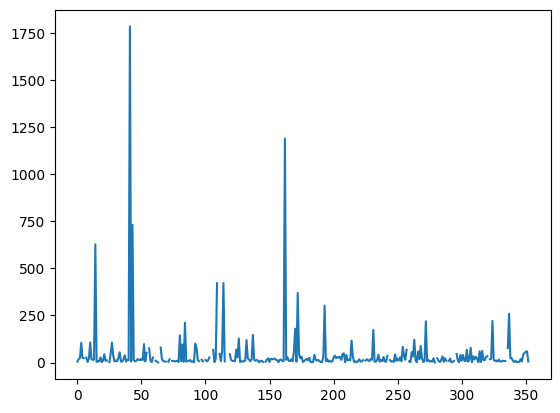

In [140]:
plt.plot(energy2)

In [129]:
np.isfinite(energy2)

TypeError: ignored

In [141]:
np.sort(energy2)

array([0.28, 0.7899999999999999, 0.9, 1.02, 1.06, 1.27, 1.33, 1.53, 1.53,
       1.67, 1.83, 1.88, 2.02, 2.08, 2.13, 2.1399999999999997, 2.2,
       2.2399999999999998, 2.2399999999999998, 2.3299999999999996, 2.37,
       2.5, 2.51, 2.55, 2.5599999999999996, 2.7, 2.74, nan, nan, nan,
       2.7699999999999996, nan, nan, nan, nan, nan, nan, 2.83, 2.87,
       3.3200000000000003, nan, 2.9200000000000004, 3.13,
       3.5300000000000002, nan, 2.99, 3.08, 3.3499999999999996, 3.63, nan,
       3.7, 3.74, 3.96, 3.9699999999999998, 4.07, nan, 3.8499999999999996,
       4.27, nan, 4.46, 4.52, 4.5600000000000005, 4.609999999999999, 4.61,
       4.62, 4.67, 4.73, 4.8, 4.8, 4.82, 4.87, nan, 4.83, 4.93, nan, 4.89,
       4.930000000000001, 4.9399999999999995, 4.97, 5.03,
       5.2299999999999995, 5.23, 5.29, 5.32, 5.46, 5.58, 5.62,
       5.709999999999999, 5.77, 5.79, 5.93, 5.9799999999999995, nan, 5.83,
       6.09, 6.13, 6.27, 6.27, 6.380000000000001, 6.41, 6.630000000000001,
       6.72000000

In [ ]:
ene

In [106]:
p = np.array(paths)
df2 = pd.DataFrame(p)
df2.to_csv('paths.csv')

<ipython-input-106-ec324aaf2afe>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p = np.array(paths)


In [108]:
df = pd.read_csv('/content/file.csv')

In [115]:
df['1']

0       11
1       97
2       31
3       46
4        2
      ... 
351     69
352      8
353    202
354     22
355     25
Name: 1, Length: 356, dtype: int64

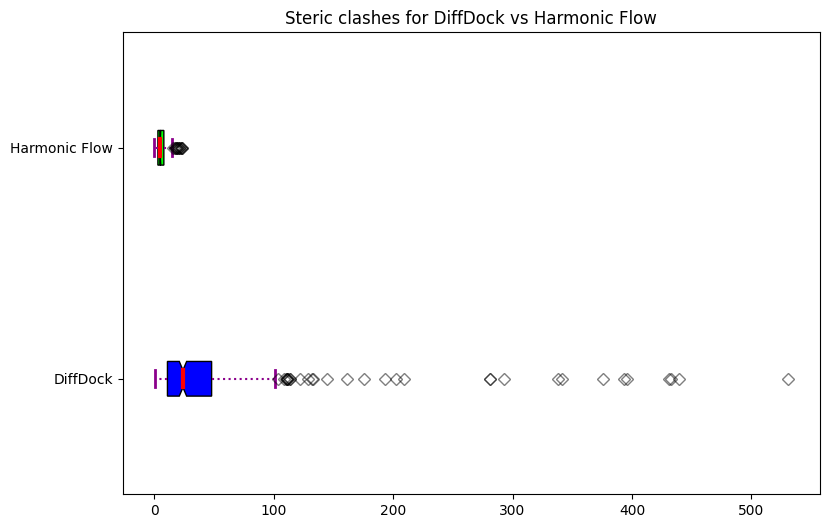

In [117]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating dataset
np.random.seed(10)
data_1 = df['1']
data_2 = values.T[1]

data = [data_1, data_2]

fig = plt.figure(figsize =(9, 6))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['DiffDock', 'Harmonic Flow'])

# Adding title
plt.title("Steric clashes for DiffDock vs Harmonic Flow")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()


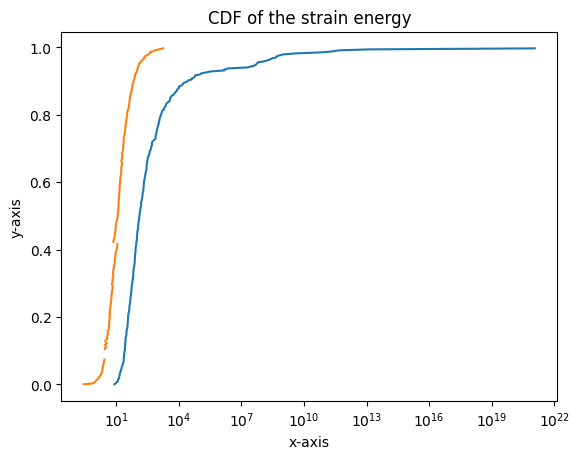

In [143]:
energy = df['2'].to_numpy()
data = energy[~np.isnan(energy)]
x = np.sort(data)
x1 = np.sort(energy2)
N = len(data)
N1 = len(x1)

# get the cdf values of y
y = np.arange(N) / float(N)
y1 = np.arange(N1)/ float(N1)

x1 = np.sort(energy2)

# plotting
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.title('CDF of the strain energy')

plt.plot(x, y)
plt.plot(x1,y1)
plt.xscale('log')

# XS code

In [16]:
len(set(HF_proteins).intersection(set(mylist)))

359

In [ ]:
import os
rootdir = '/content/gdrive/MyDrive/Protein_data/user_predictions_testset'


In [ ]:
for i,item in enumerate(mylist):

In [ ]:
import os
rootdir2 = '/content/gdrive/MyDrive/Protein_data/refined-set'

for subdir, dirs, files in os.walk(rootdir):
      for file in files:
        for i,item in enumerate(mylist):
          if item in os.path.join(subdir, file) and 'rank1.sdf' in os.path.join(subdir, file):
            #df['Predicted_Mol_path'].iloc[i] = os.path.join(subdir, file)
            print(os.path.join(subdir, file))

In [35]:
df

,complex_name,protein_path,ligand_description,Predicted_Mol_path
0,0,/content/gdrive/MyDrive/Protein_data/refined-s...,data/PDBBind_processed/6qqw/6qqw_ligand.mol2,/content/gdrive/MyDrive/Protein_data/user_pred...
1,1,NA,data/PDBBind_processed/6d08/6d08_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...
2,2,/content/gdrive/MyDrive/Protein_data/refined-s...,data/PDBBind_processed/6jap/6jap_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...
3,3,/content/gdrive/MyDrive/Protein_data/refined-s...,data/PDBBind_processed/6np2/6np2_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...
4,4,NA,data/PDBBind_processed/6uvp/6uvp_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...
...,...,...,...,...
358,358,NA,data/PDBBind_processed/6pya/6pya_ligand.mol2,/content/gdrive/MyDrive/Protein_data/user_pred...
359,359,NA,data/PDBBind_processed/6ffe/6ffe_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...
360,360,NA,data/PDBBind_processed/6d3x/6d3x_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...
361,361,/content/gdrive/MyDrive/Protein_data/refined-s...,data/PDBBind_processed/6gj8/6gj8_ligand.mol2,/content/gdrive/MyDrive/Protein_data/user_pred...


In [ ]:
pc.load_protein_from_pdb("/content/gdrive/MyDrive/Protein_data/inference_output/5zcu/5zcu_protein_processed.pdb")

/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:472: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
[00:21:33] Explicit valence for atom # 1307 N, 4, is greater than permitted
/usr/local/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:500: UserWarning: Could not sanitize molecule: failed during step rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_PROPERTIES
  warnings.warn("Could not sanitize molecule: "


In [39]:
values

[]

In [ ]:
# import required module
import os
# assign directory
directory = '/content/gdrive/MyDrive/Protein_data/user_predictions_testset'

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(f)

/content/gdrive/MyDrive/Protein_data/user_predictions_testset/complex_names.npy
/content/gdrive/MyDrive/Protein_data/user_predictions_testset/confidences.npy
/content/gdrive/MyDrive/Protein_data/user_predictions_testset/run_times.npy
/content/gdrive/MyDrive/Protein_data/user_predictions_testset/no_overlap_rmsds.npy
/content/gdrive/MyDrive/Protein_data/user_predictions_testset/no_overlap_min_cross_distances.npy
/content/gdrive/MyDrive/Protein_data/user_predictions_testset/no_overlap_min_self_distances.npy
/content/gdrive/MyDrive/Protein_data/user_predictions_testset/rmsds.npy
/content/gdrive/MyDrive/Protein_data/user_predictions_testset/names.npy
/content/gdrive/MyDrive/Protein_data/user_predictions_testset/no_overlap_names.npy
/content/gdrive/MyDrive/Protein_data/user_predictions_testset/min_cross_distances.npy
/content/gdrive/MyDrive/Protein_data/user_predictions_testset/min_self_distances.npy


In [ ]:
import os
rootdir = '/content/gdrive/MyDrive/Protein_data/user_predictions_testset'
for i,item in enumerate(mylist):
  for subdir, dirs, files in os.walk(rootdir):
      for file in files:
          if item in os.path.join(subdir, file) and 'rank1.sdf' in os.path.join(subdir, file):
            df['Predicted_Mol_path'].iloc[i] = os.path.join(subdir, file)
